In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()
plt.style.use("ggplot")

In [2]:
from glob import glob

data_folder = glob("../outputs/*")

tdfs = []

for folder in data_folder:
    files = glob(folder + "/*.csv")
    tdf = pd.concat([pd.read_csv(f) for f in files])
    tdf["generation"] = folder.split("/")[-1]
    tdfs.append(tdf)

data = pd.concat(tdfs)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,generation
0,Chesnaught,NaN,leftovers,bulletproof,drainpunch,woodhammer,spikyshield,leechseed,NaN,85,...,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN,NaN,32
1,Gogoat,NaN,leftovers,sapsipper,milkdrink,leechseed,hornleech,rockslide,NaN,85,...,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,32
2,Hippowdon,NaN,leftovers,sandstream,slackoff,stealthrock,toxic,earthquake,NaN,85,...,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,32
3,Swampert,NaN,swampertite,damp,waterfall,icepunch,earthquake,raindance,NaN,85,...,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,32
4,Vaporeon,NaN,leftovers,waterabsorb,wish,protect,toxic,scald,NaN,85,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,86.0,NaN,32


Text(0.5, 0, 'Generation')

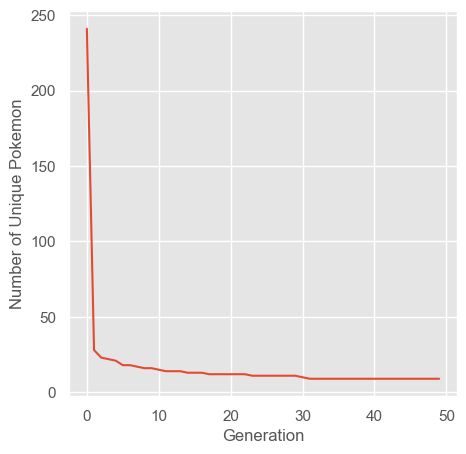

In [3]:
n_poke_per_gen = data.groupby("generation")["0"].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)

ax.plot(np.arange(len(n_poke_per_gen)), n_poke_per_gen)
ax.set_ylabel("Number of Unique Pokemon")
ax.set_xlabel("Generation")

In [4]:
n_poke_per_gen

generation
0     241
1      28
2      23
3      22
4      21
6      18
5      18
7      17
8      16
9      16
10     15
13     14
12     14
11     14
15     13
14     13
16     13
19     12
18     12
22     12
21     12
20     12
17     12
26     11
25     11
28     11
29     11
24     11
23     11
27     11
30     10
49      9
48      9
47      9
43      9
46      9
45      9
44      9
36      9
42      9
41      9
40      9
39      9
38      9
37      9
35      9
34      9
33      9
32      9
31      9
Name: 0, dtype: int64

/var/folders/3j/bbvq43sj5rv84frkw91drj5w0000gq/T/ipykernel_7865/2192592723.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, figsize=(10, 10), dpi=100)


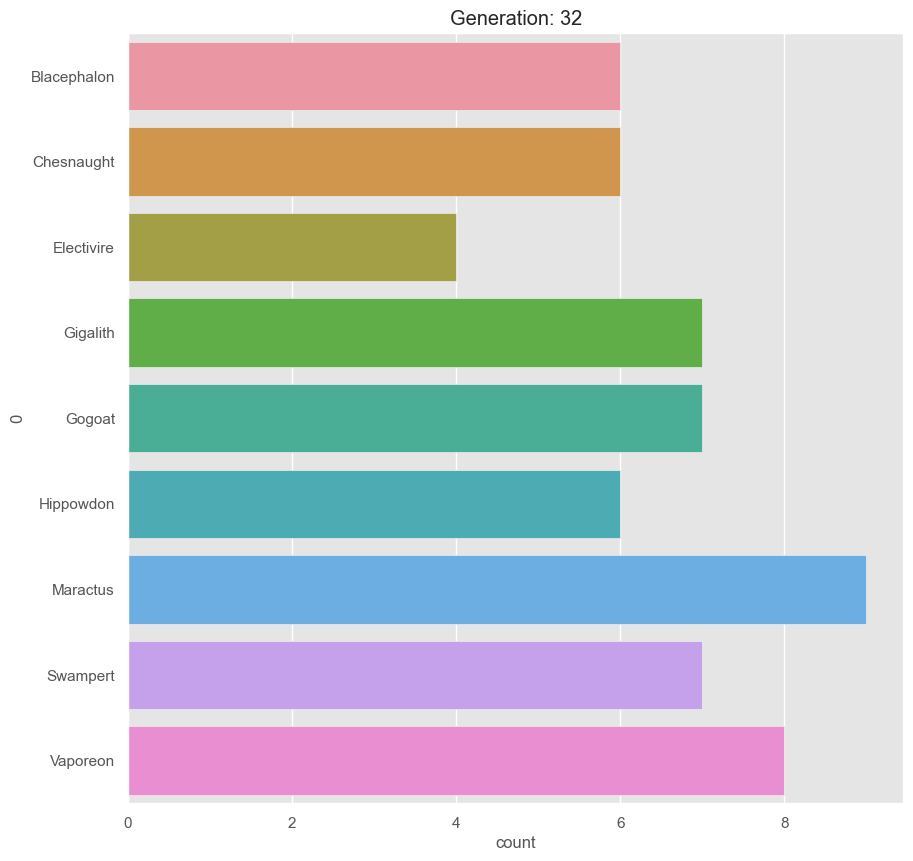

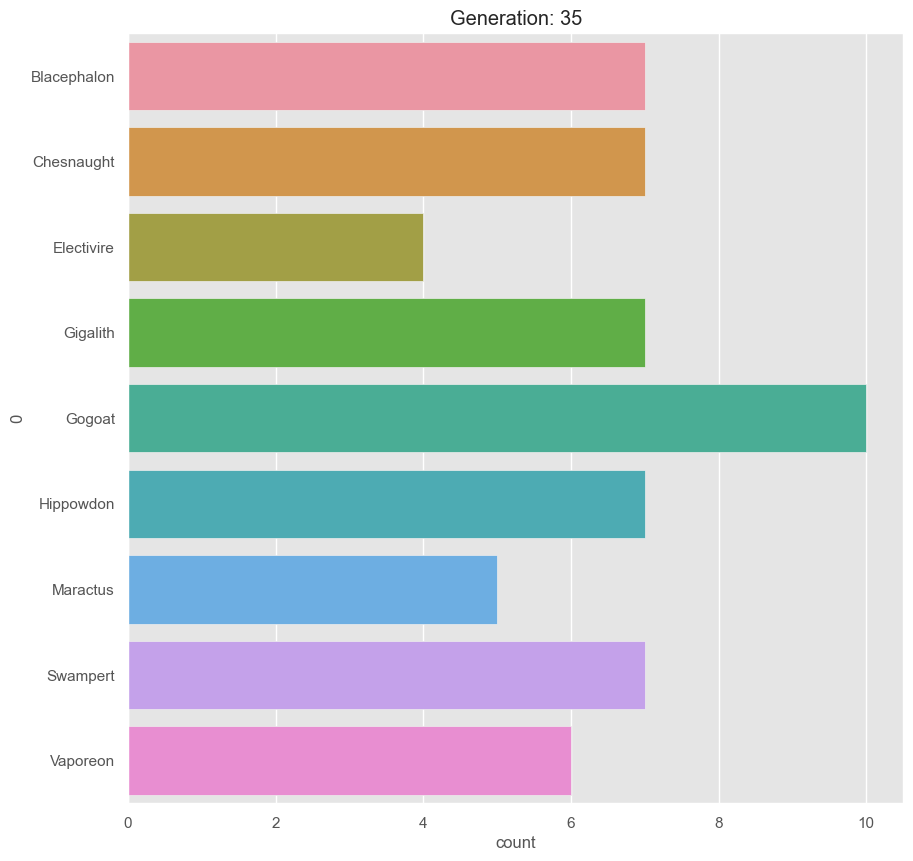

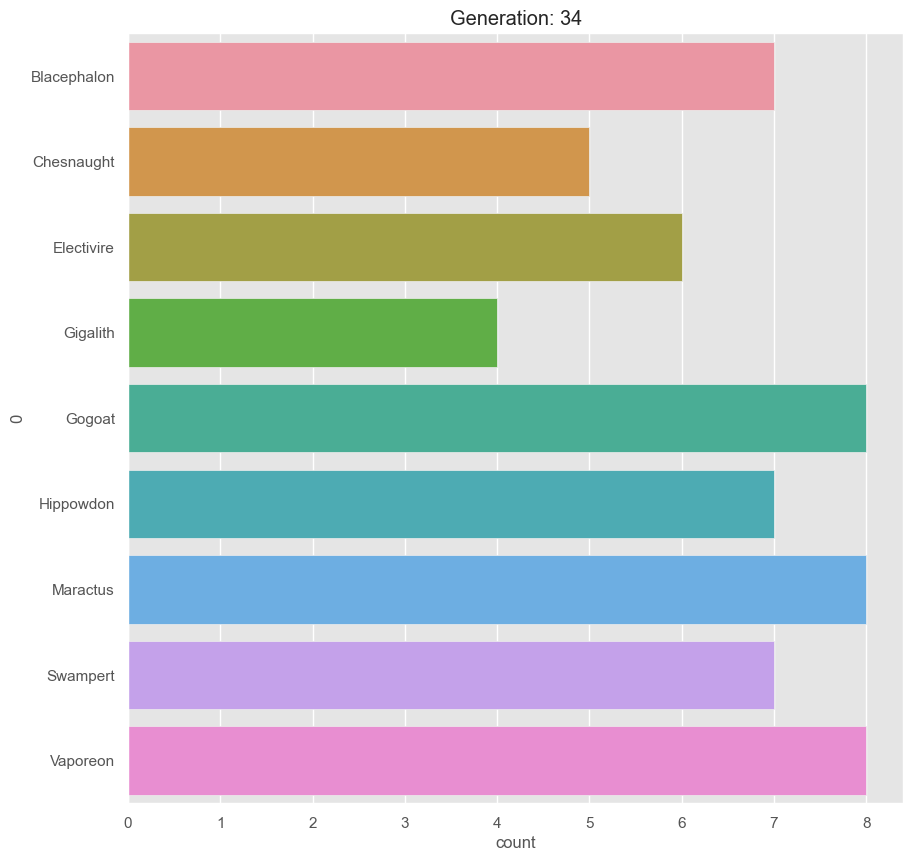

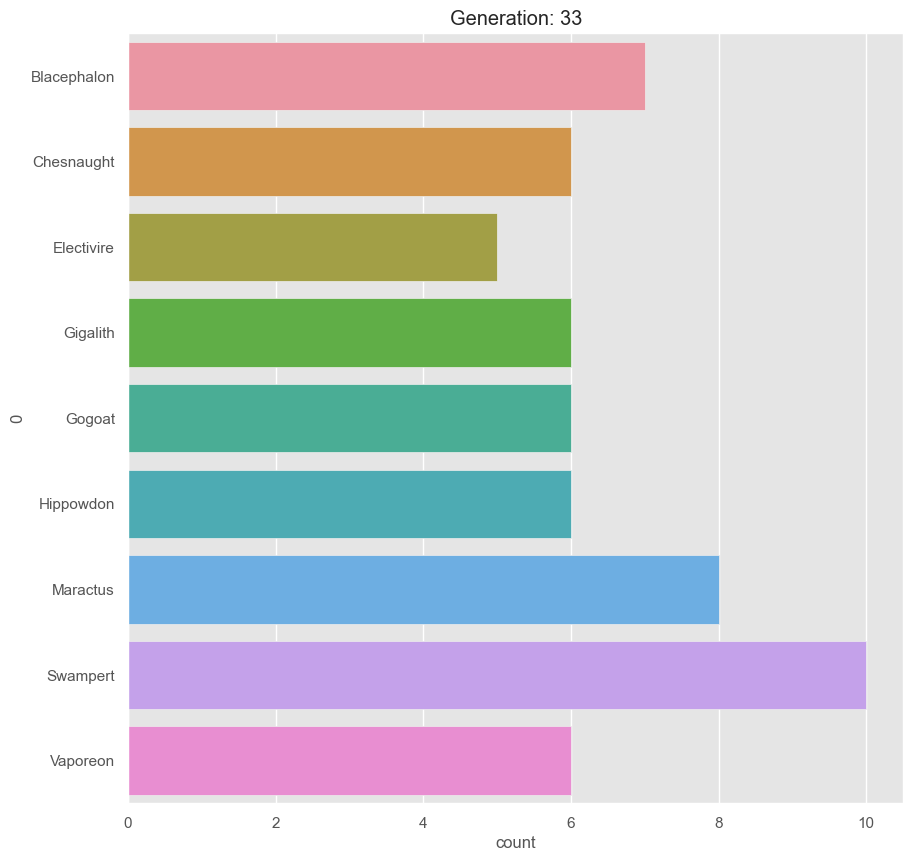

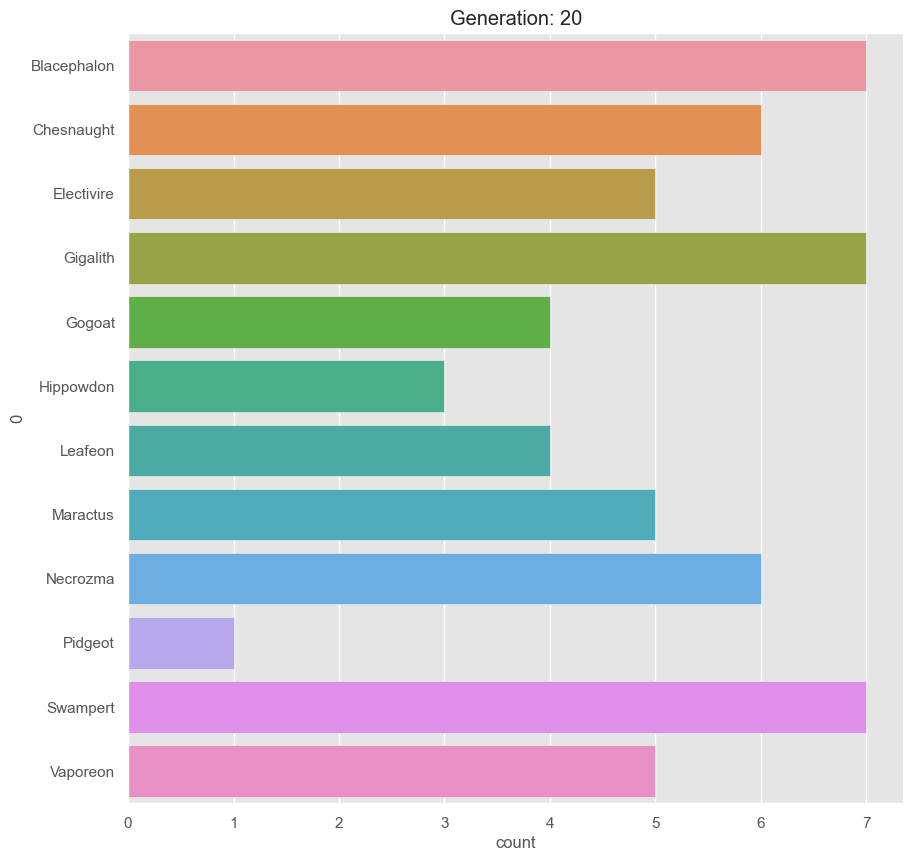

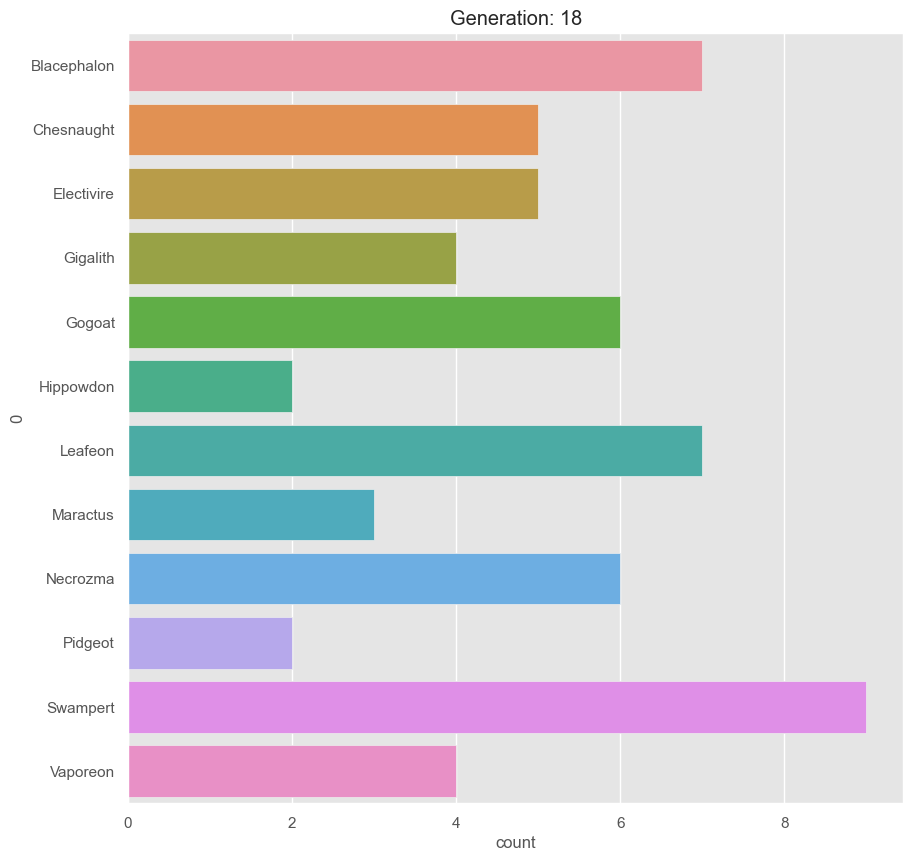

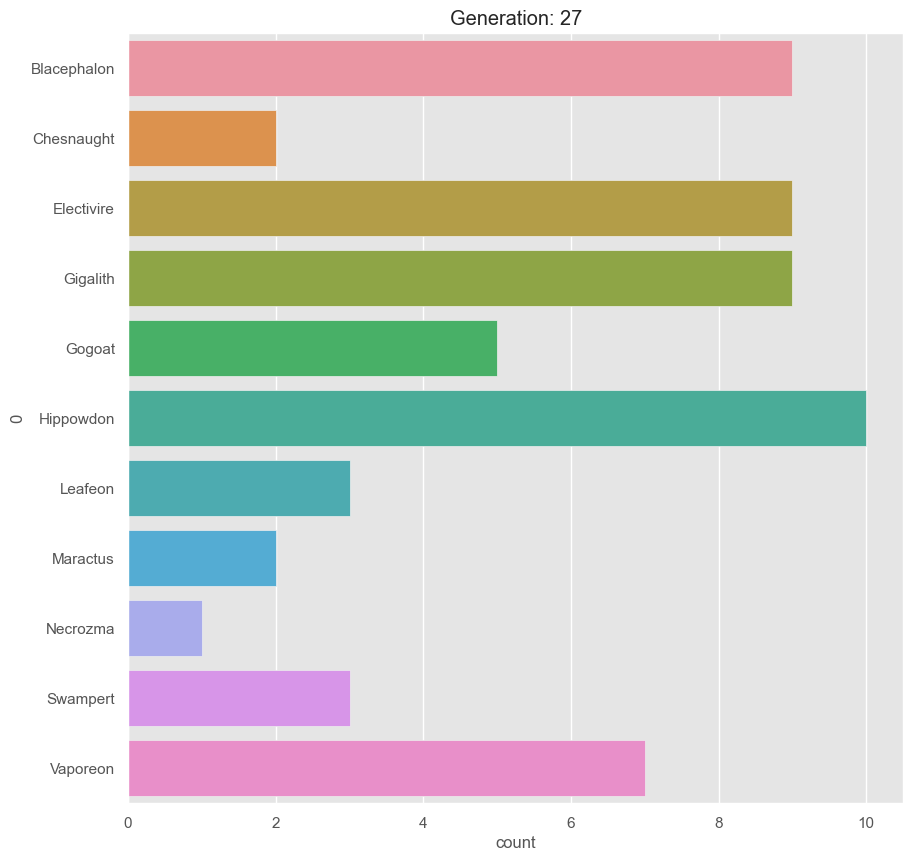

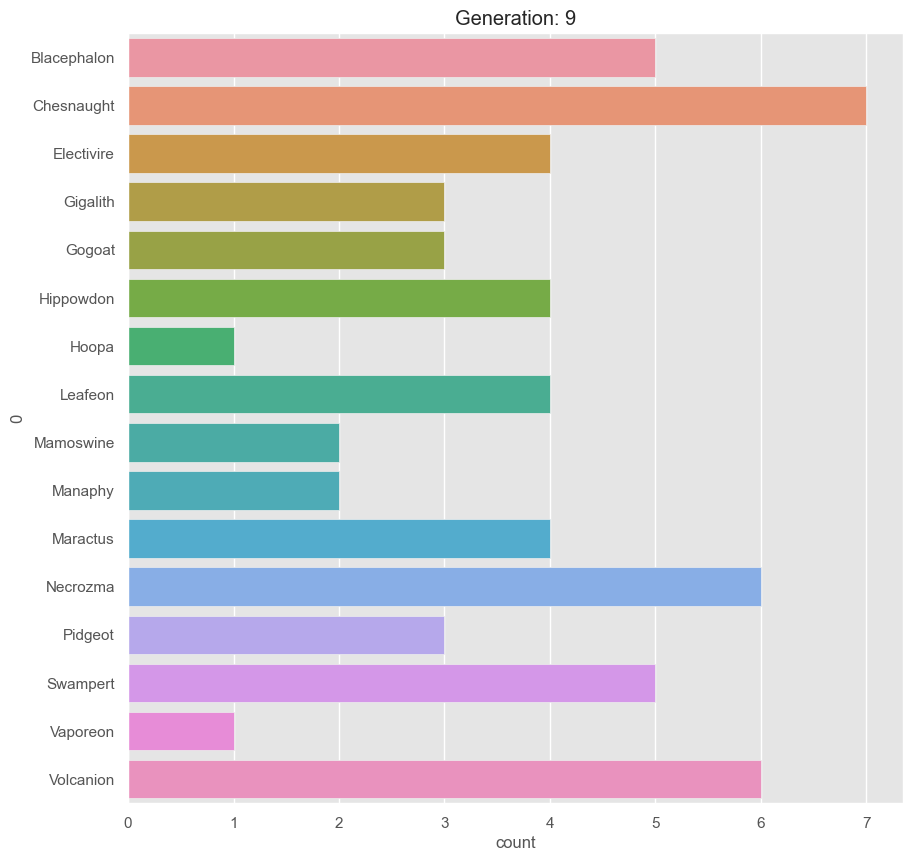

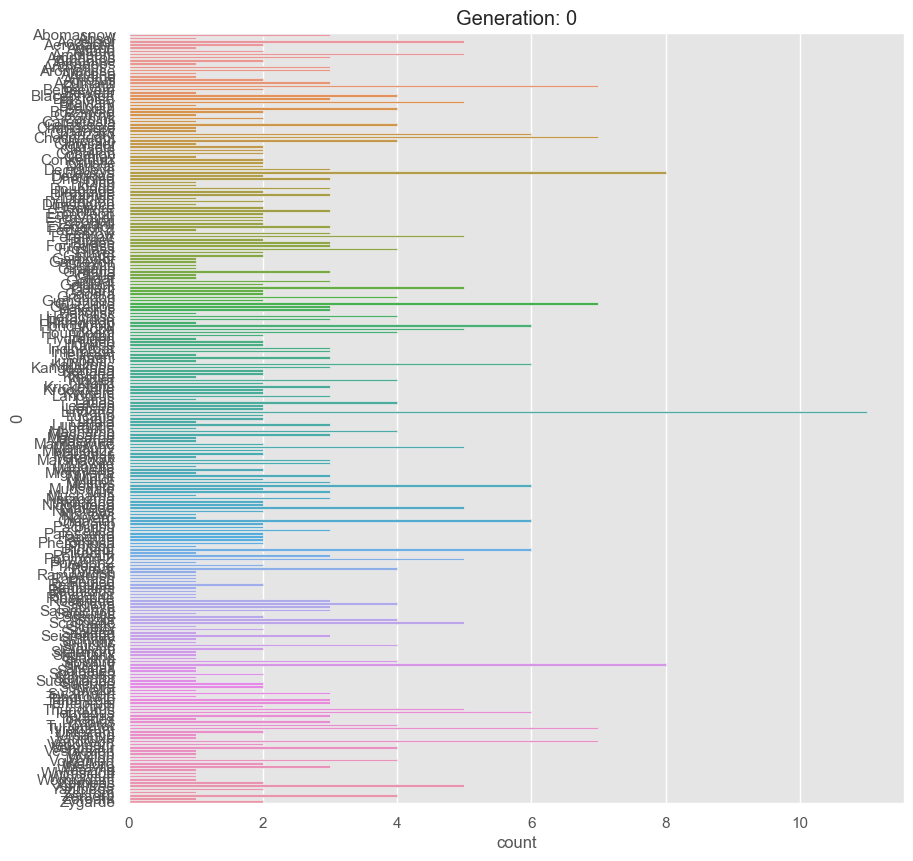

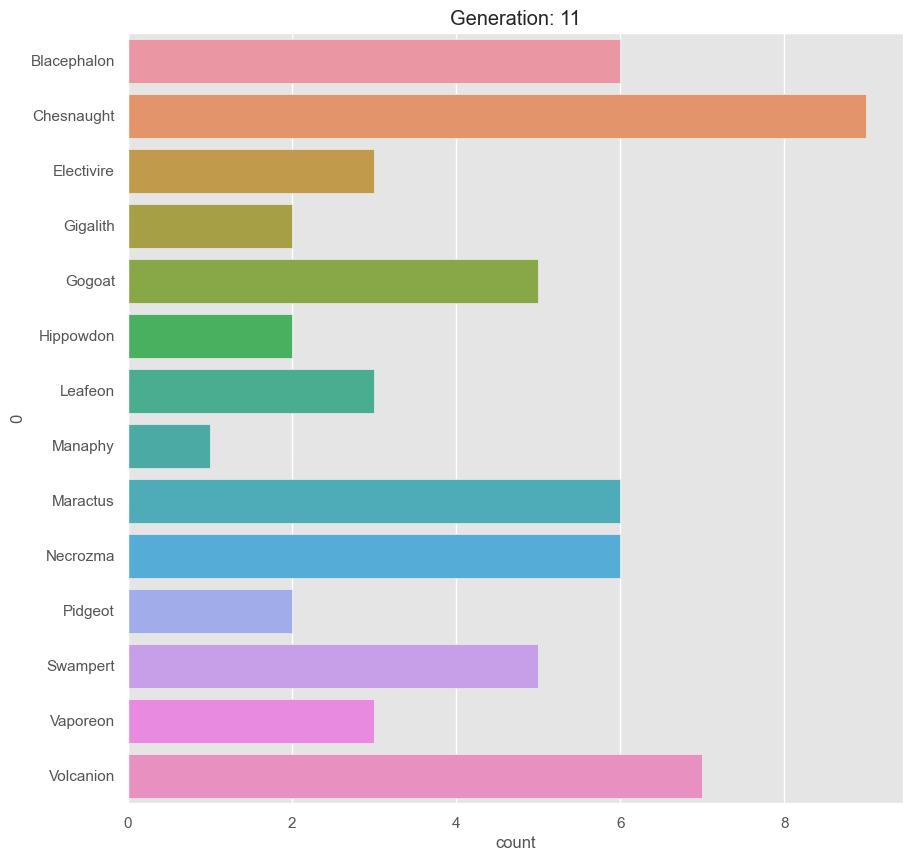

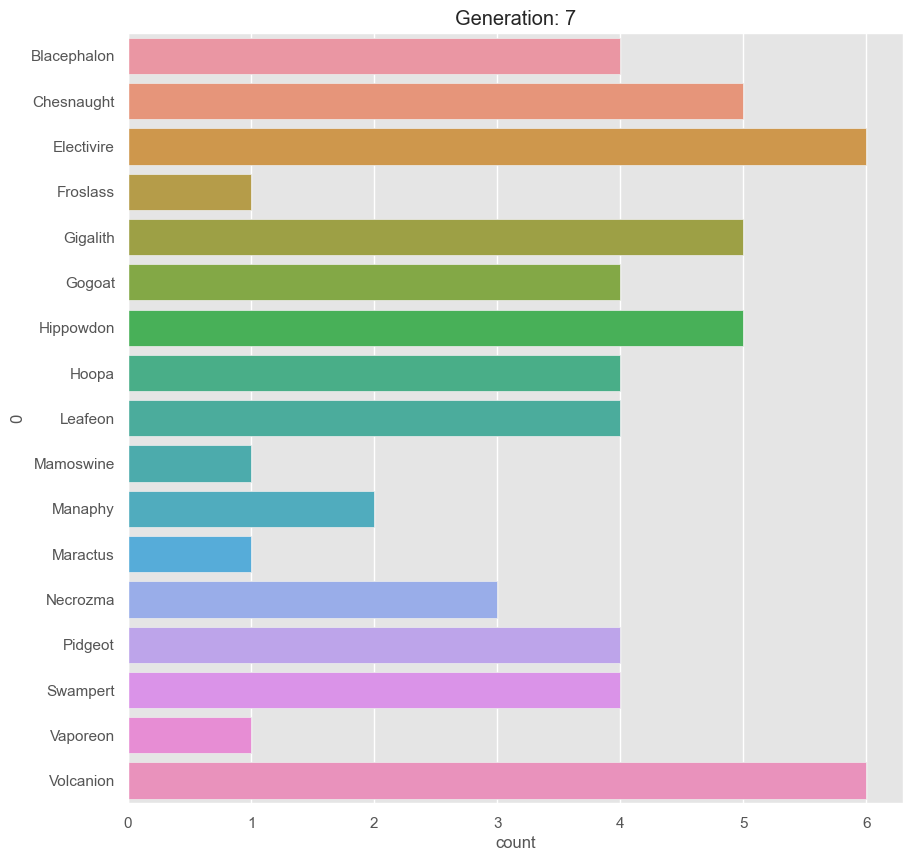

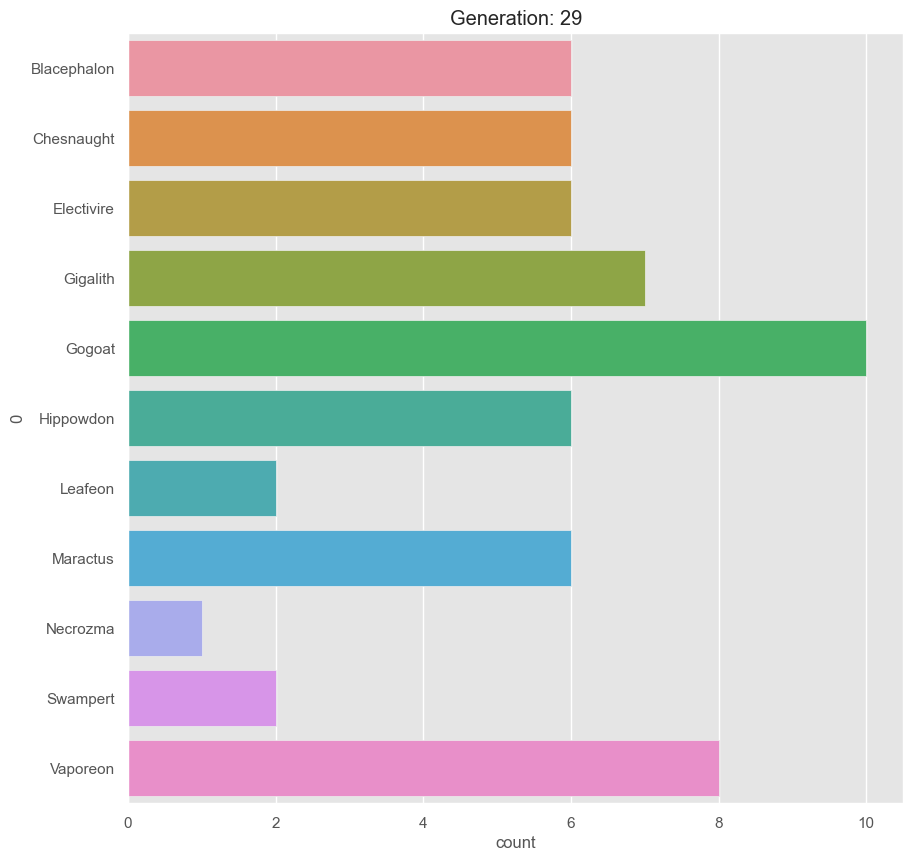

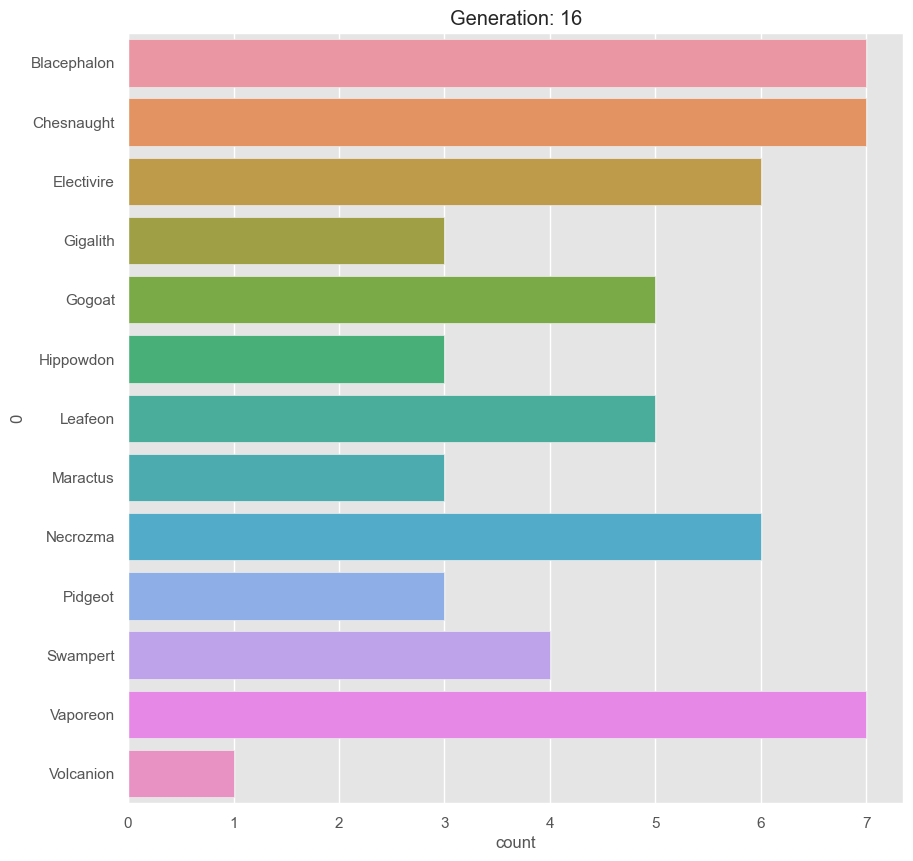

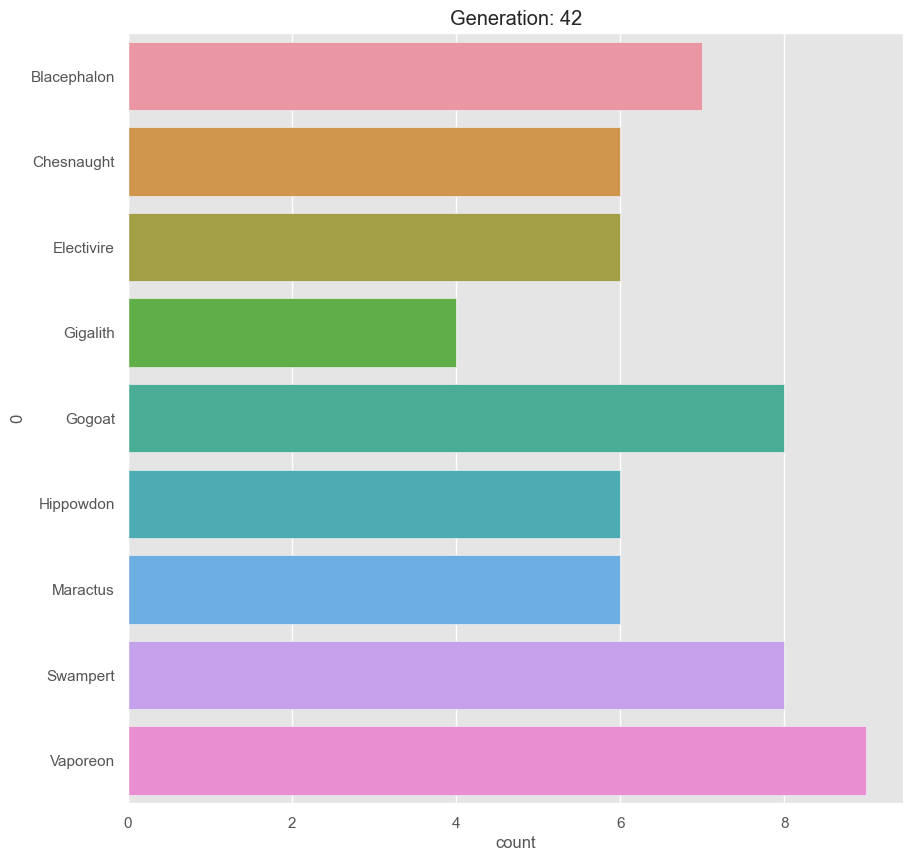

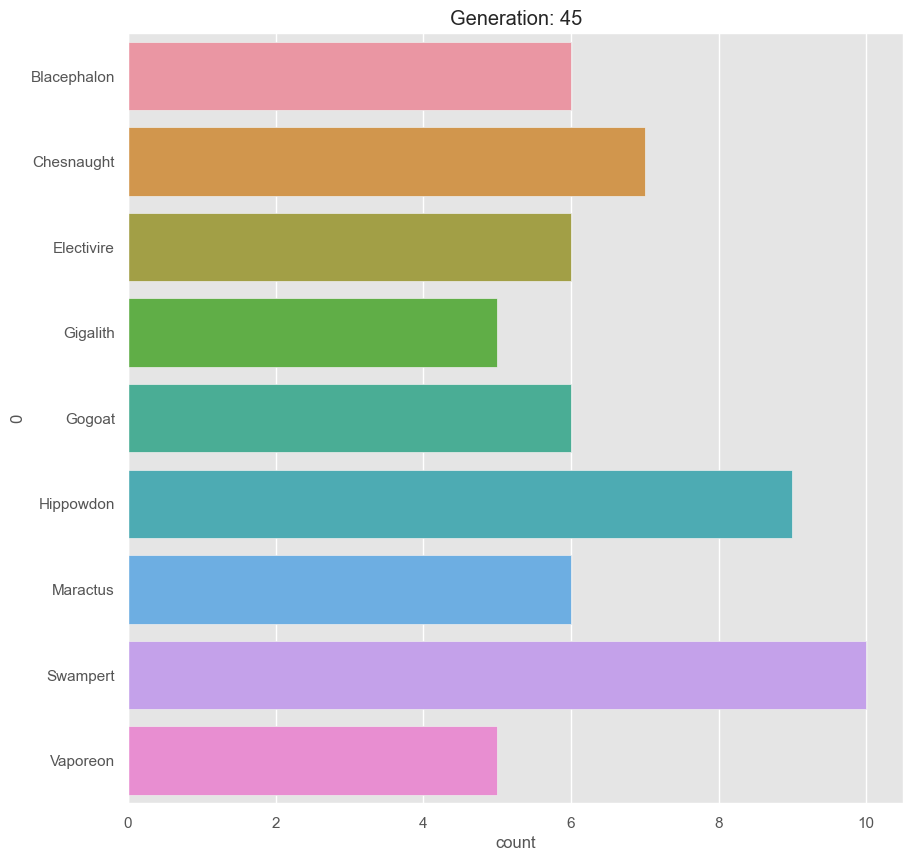

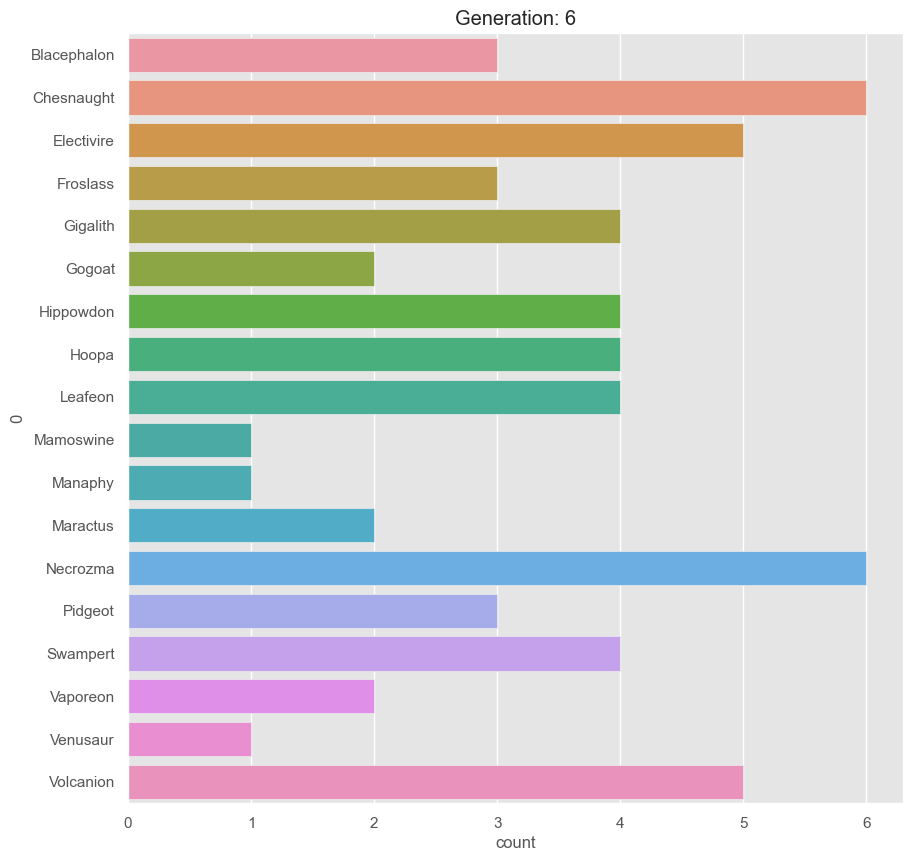

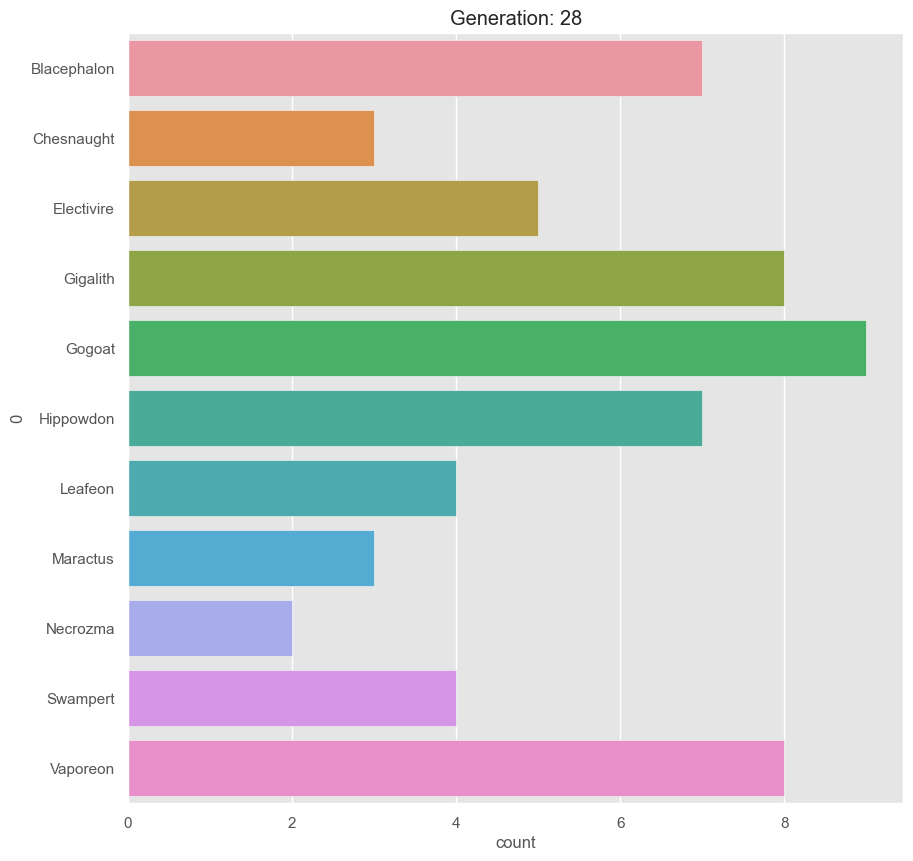

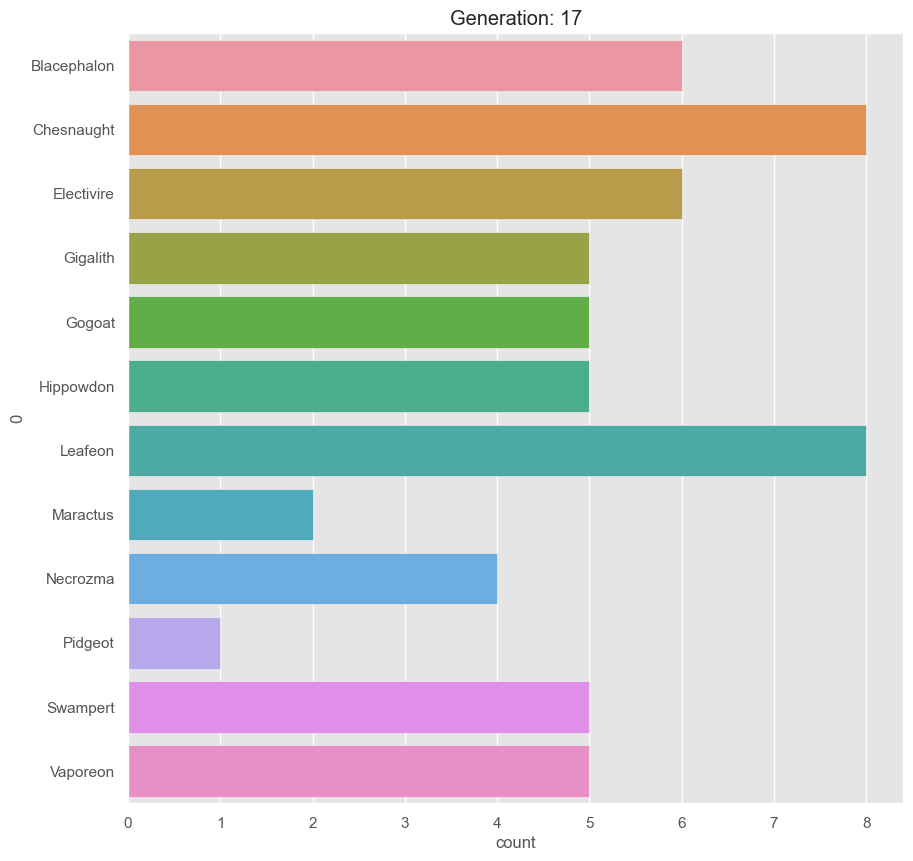

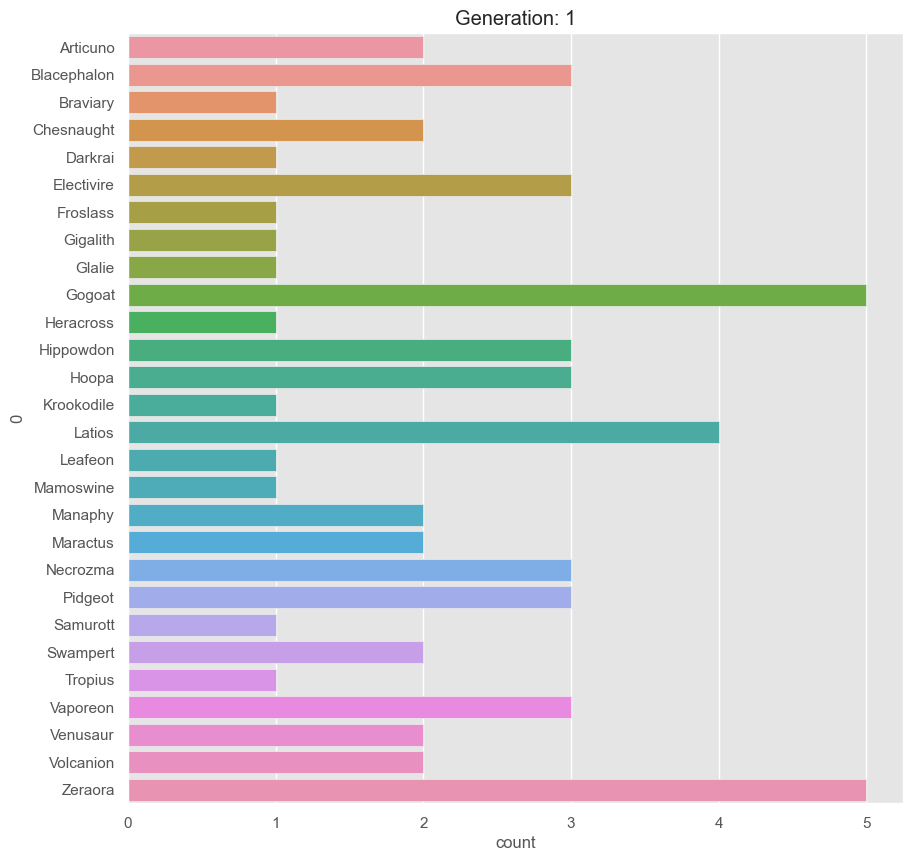

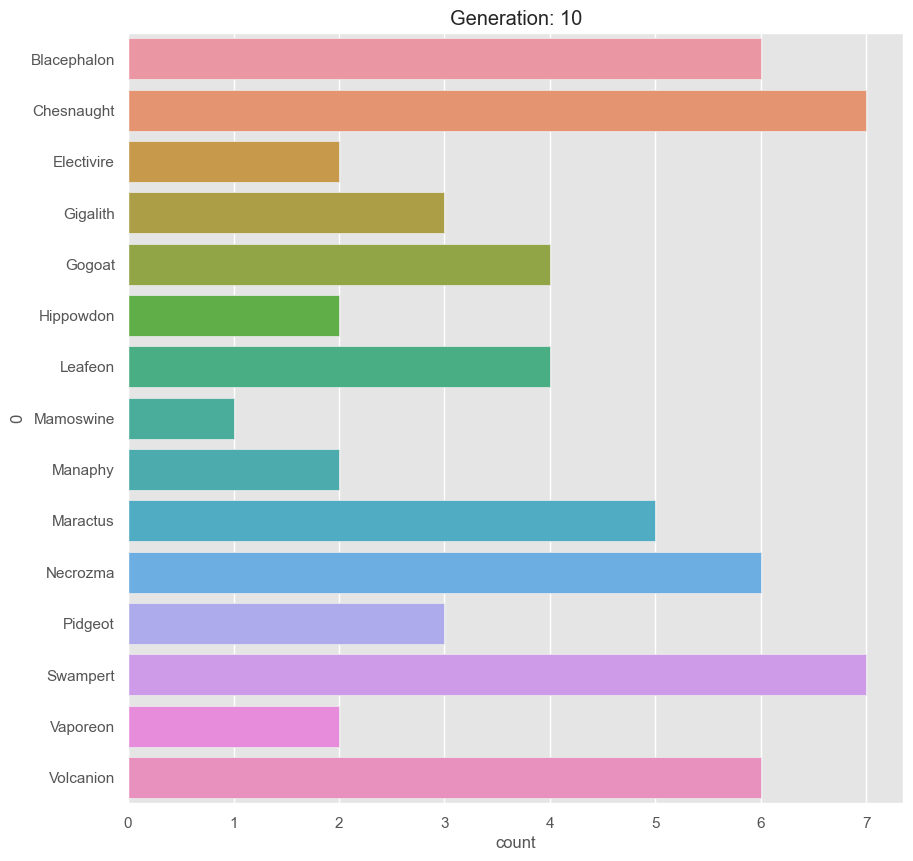

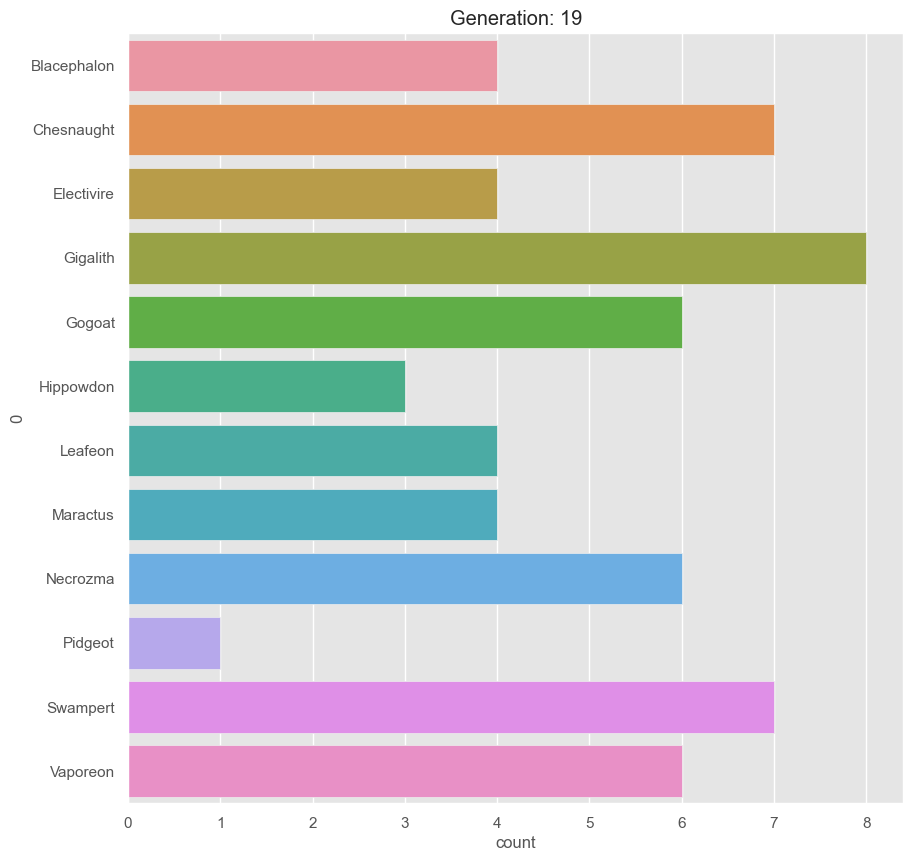

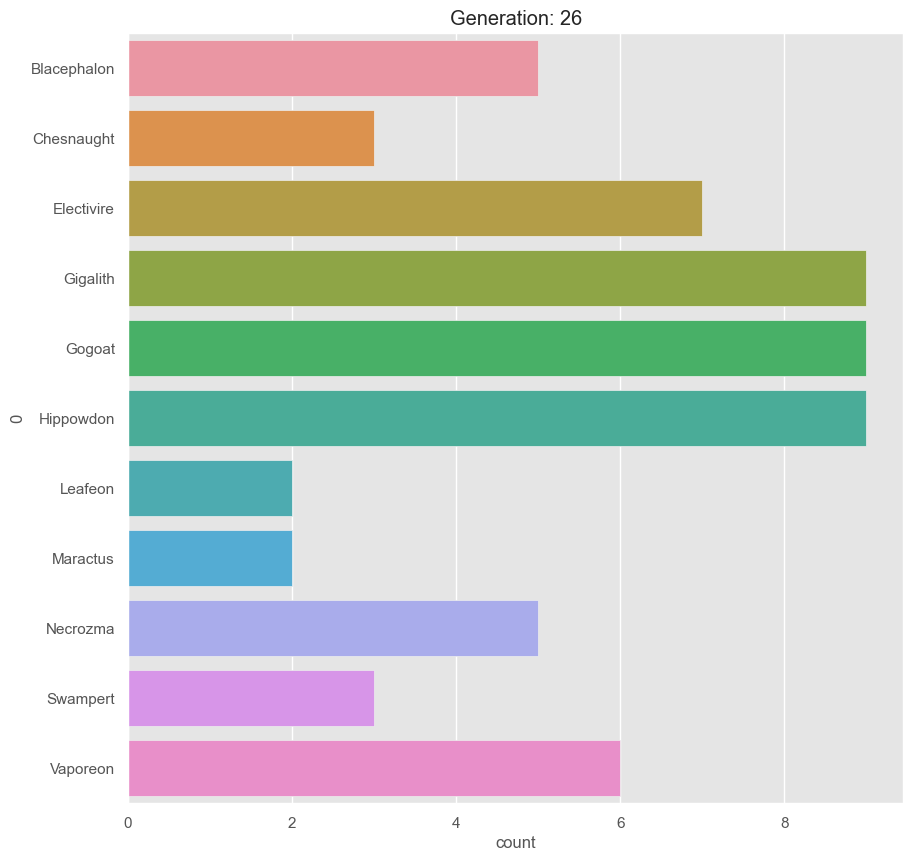

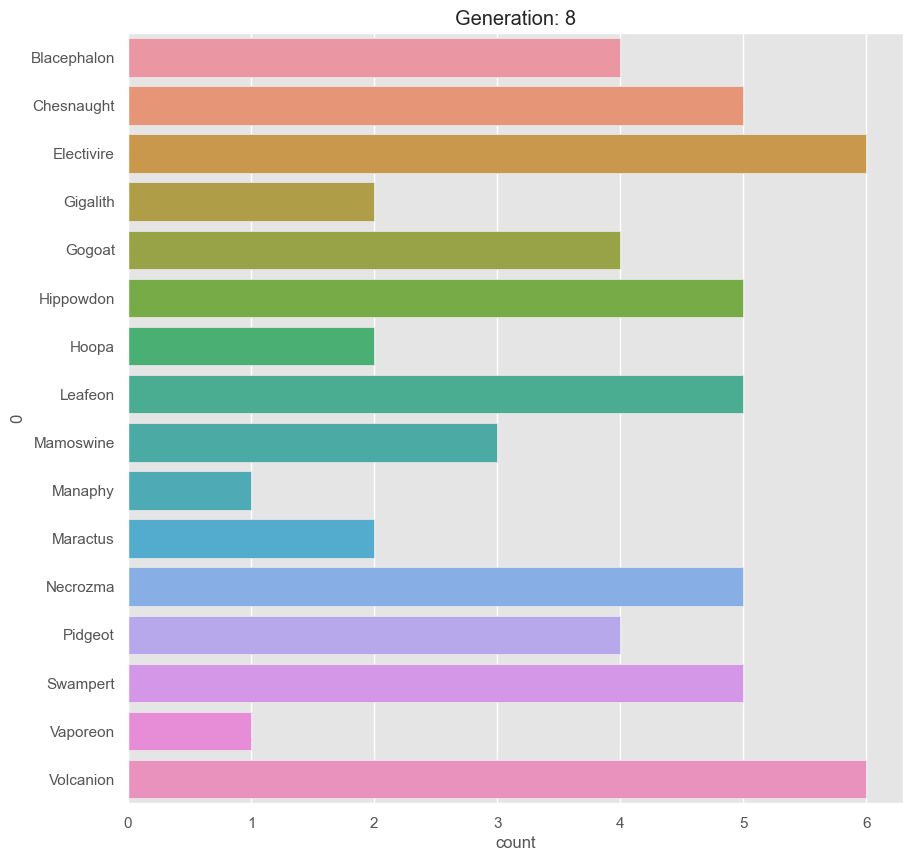

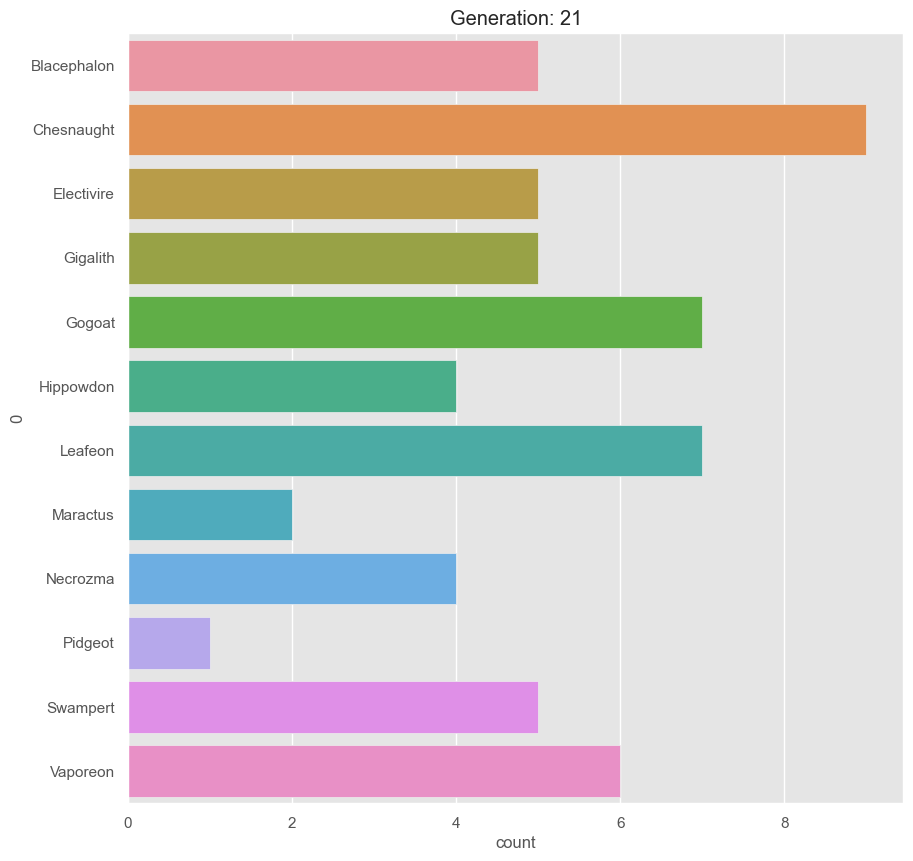

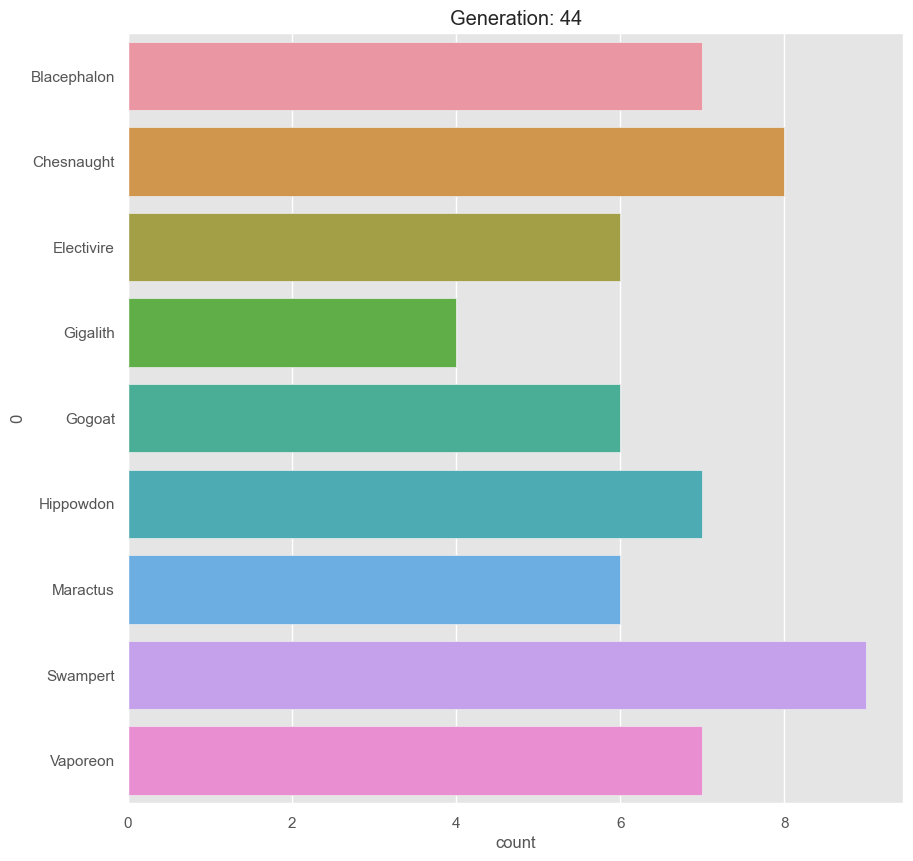

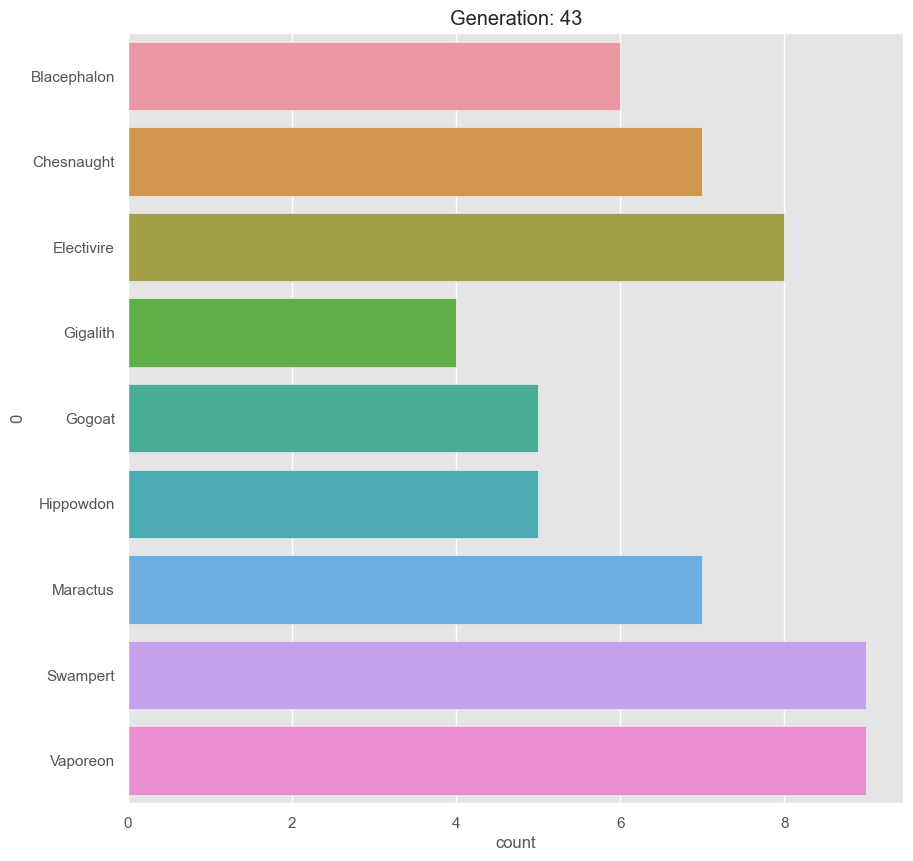

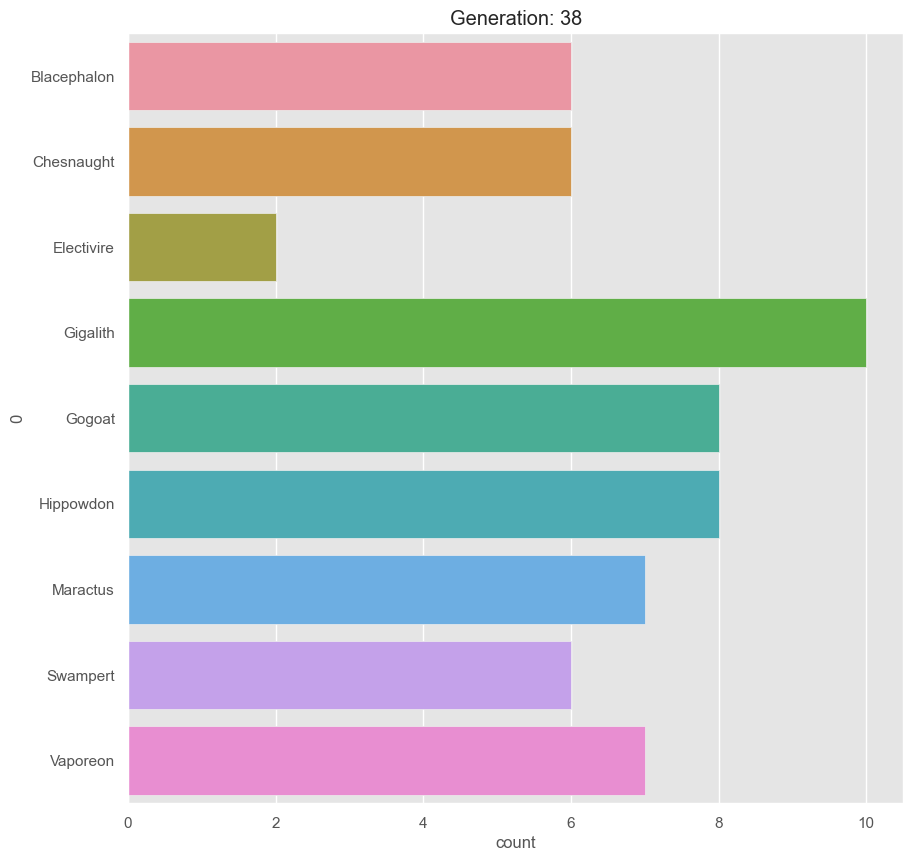

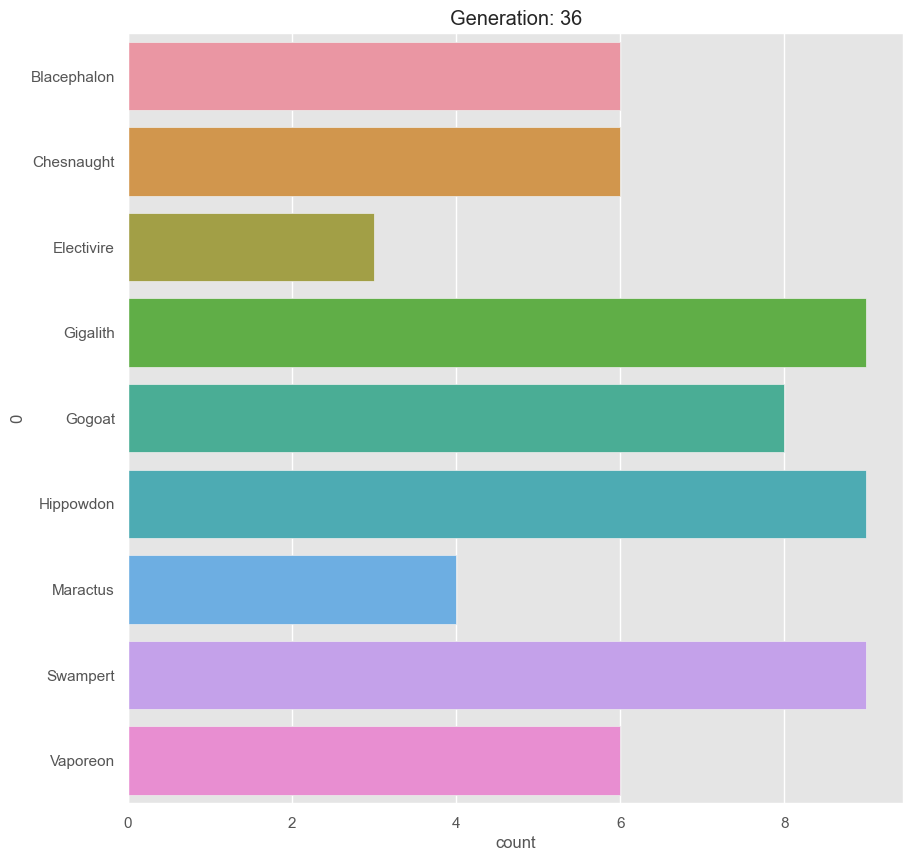

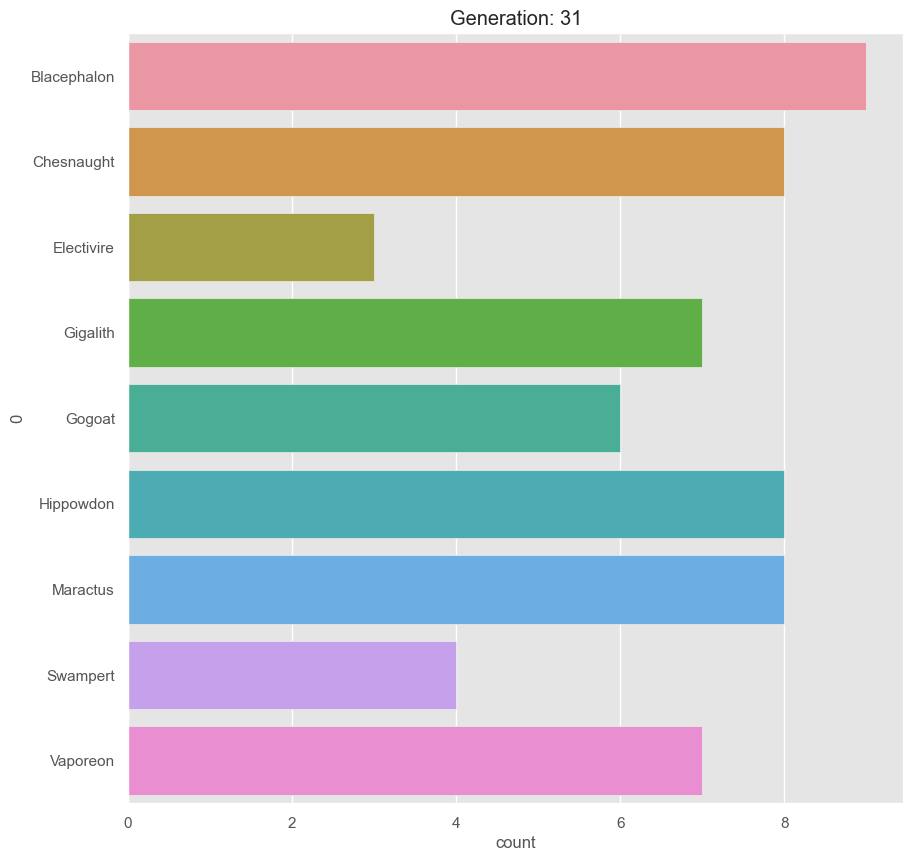

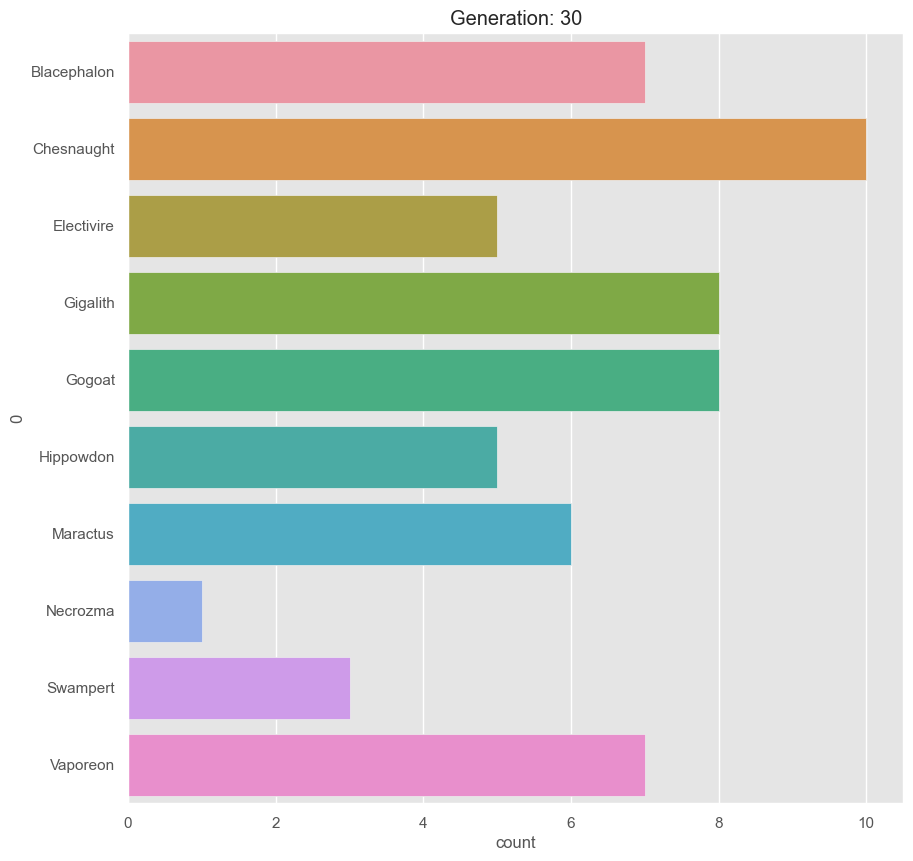

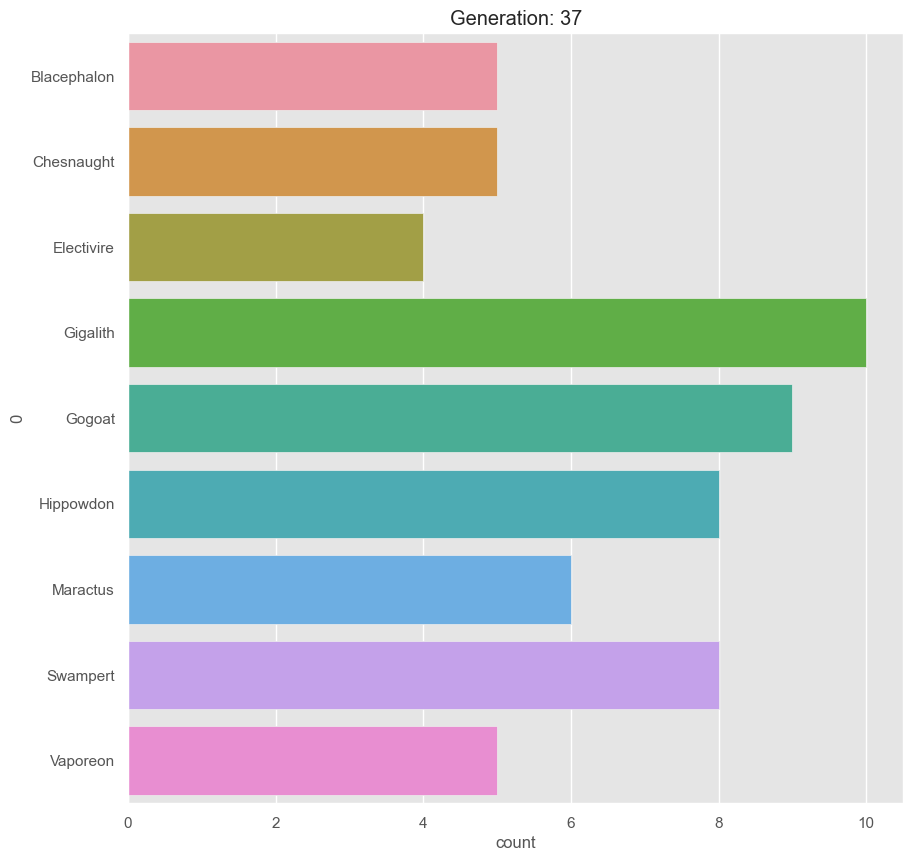

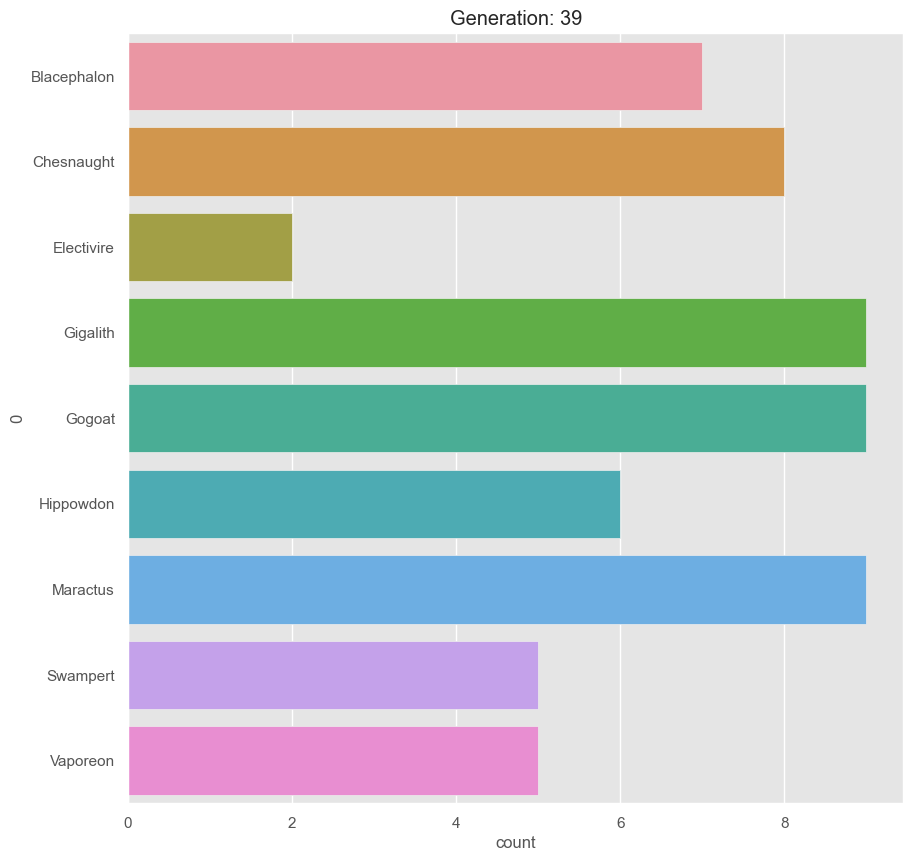

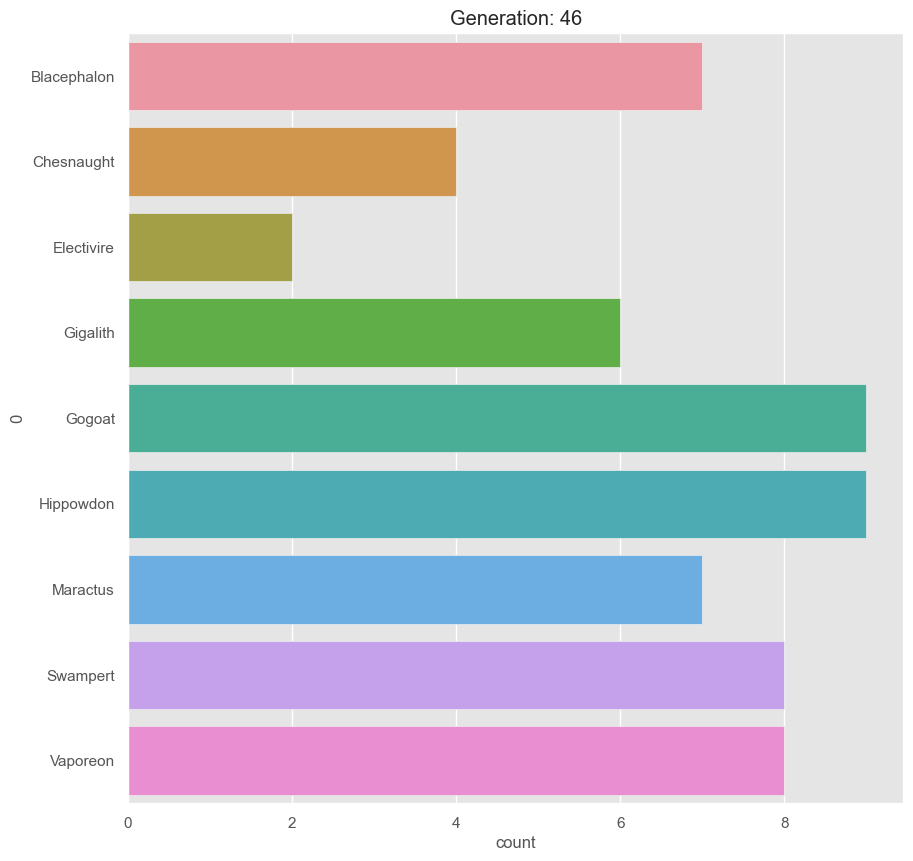

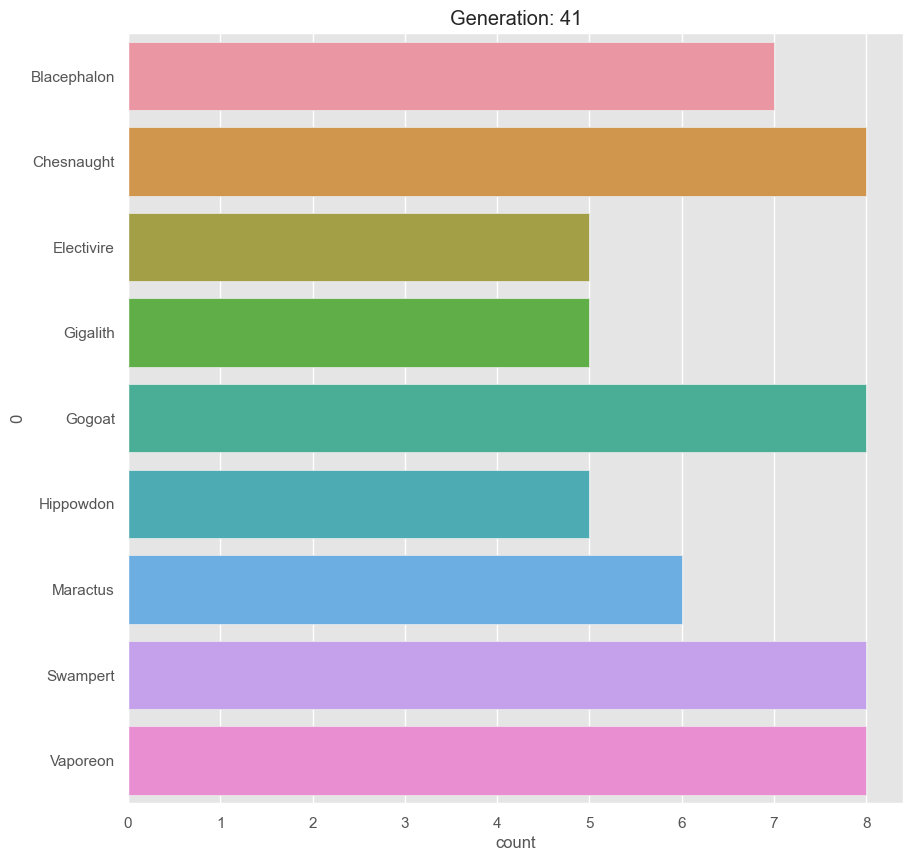

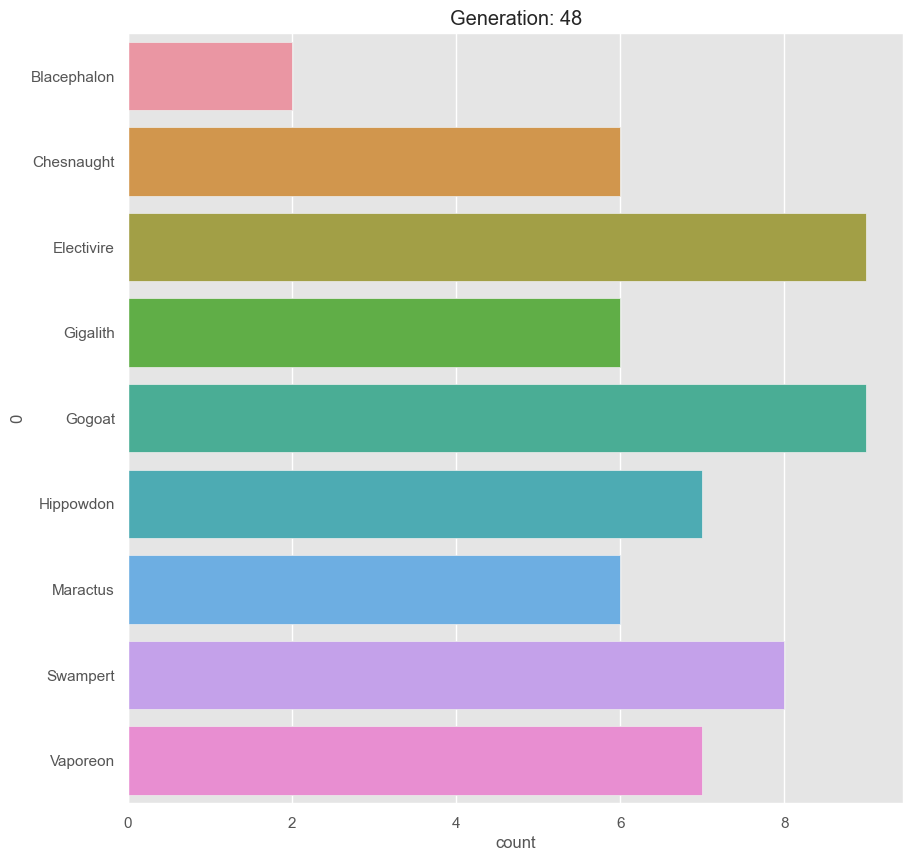

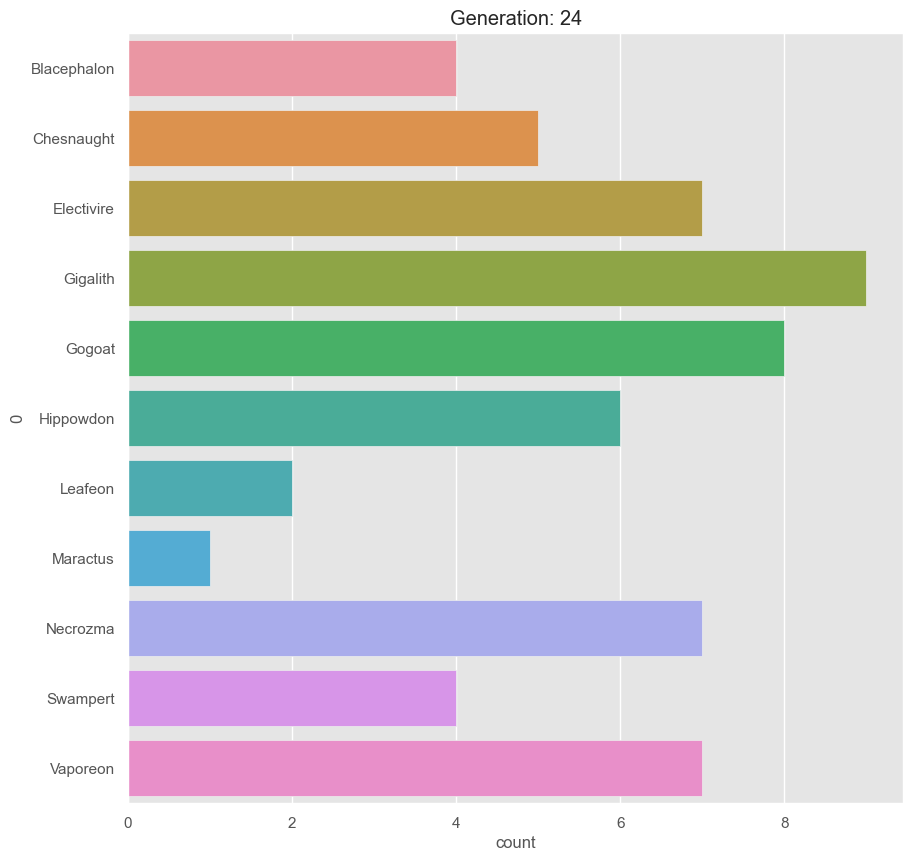

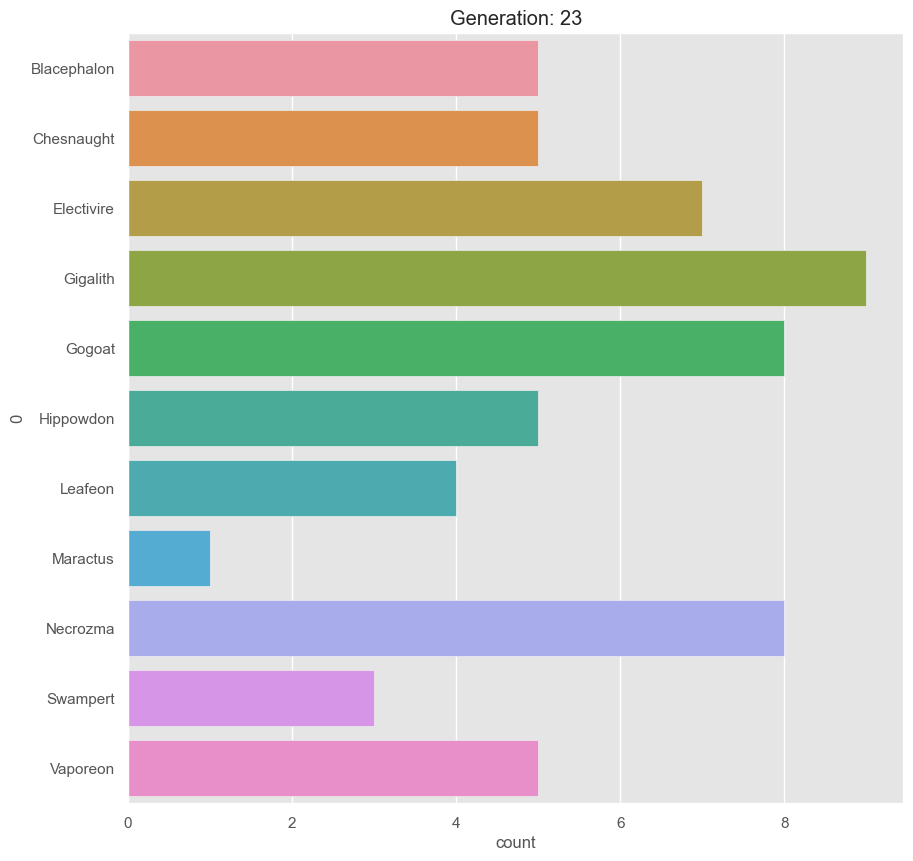

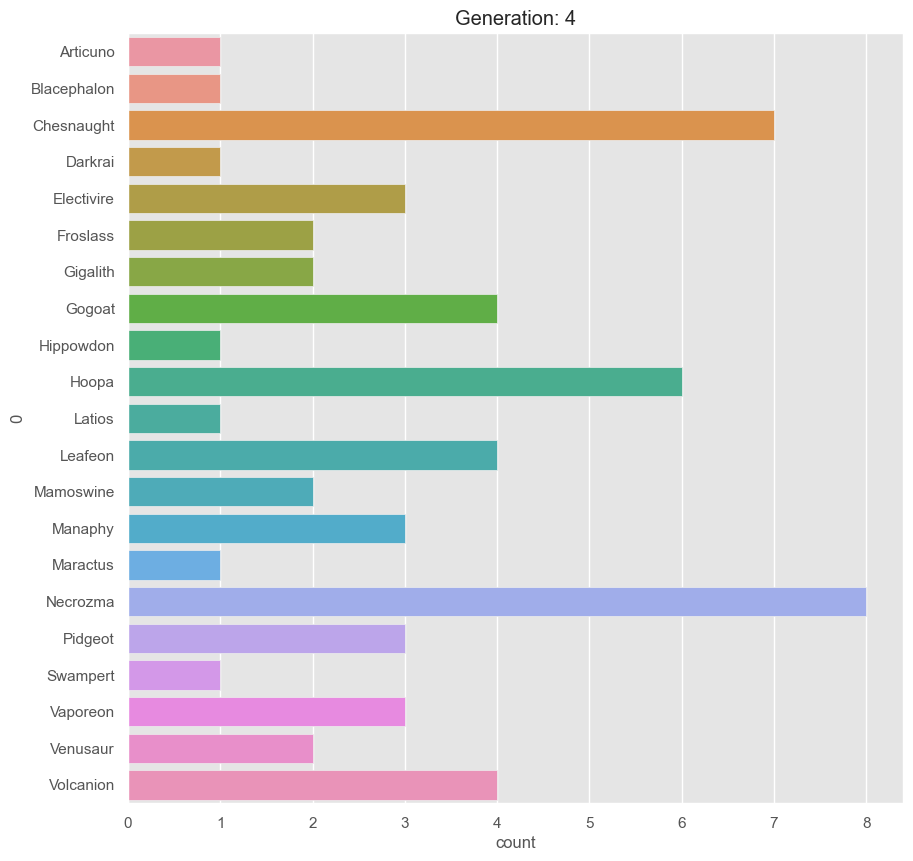

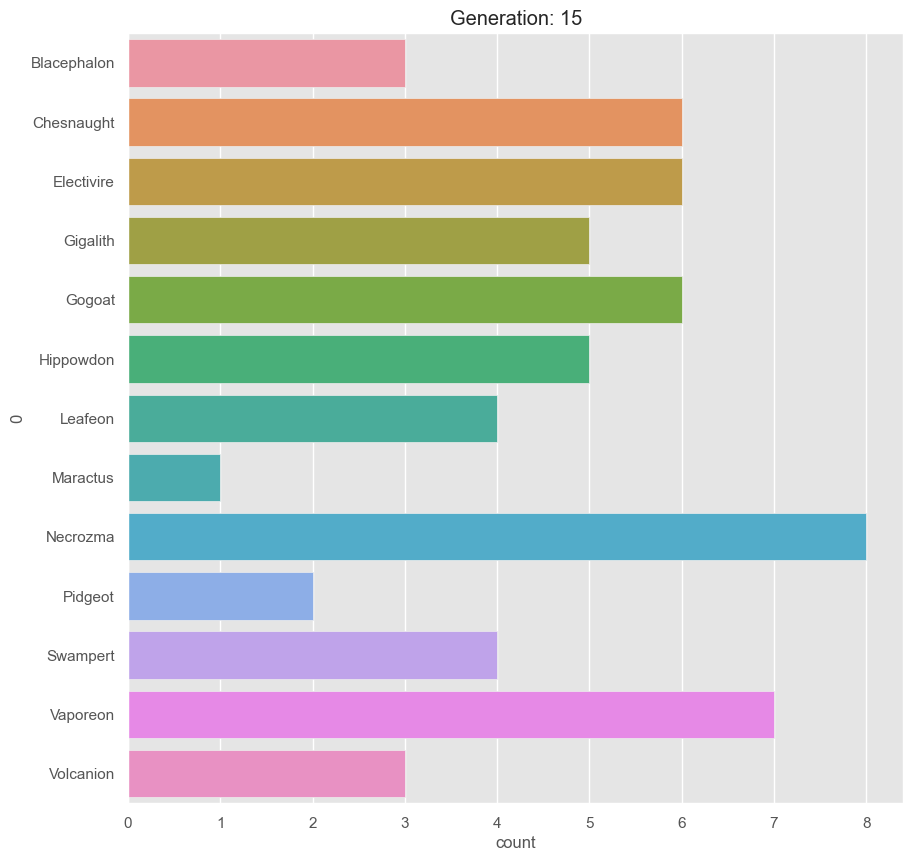

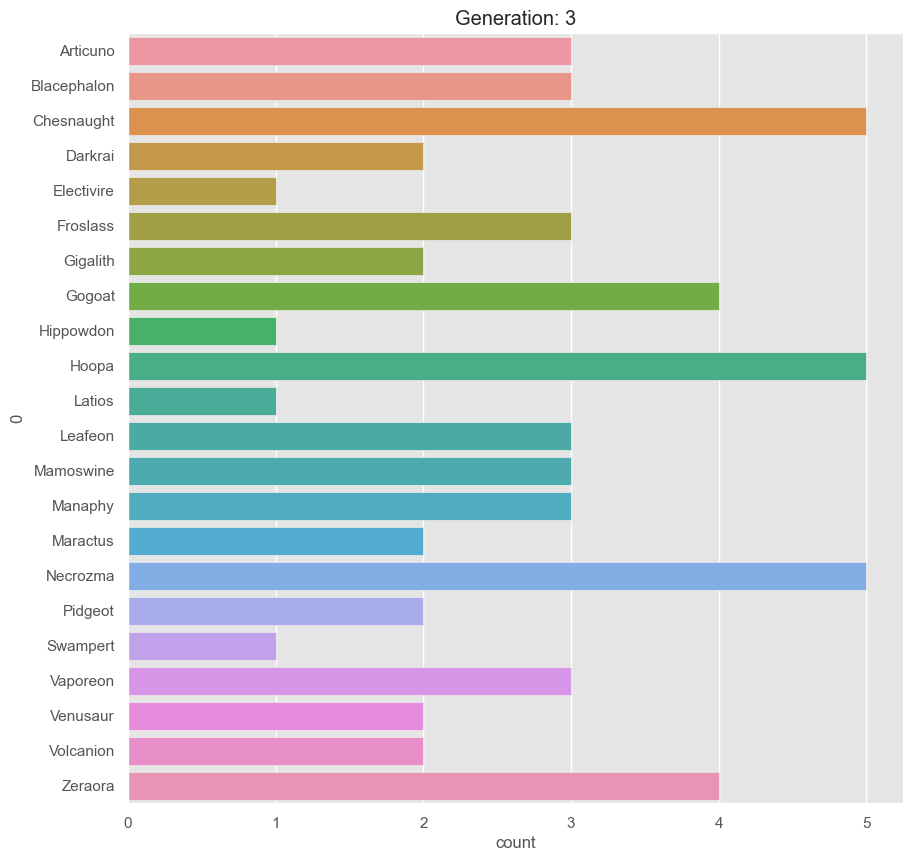

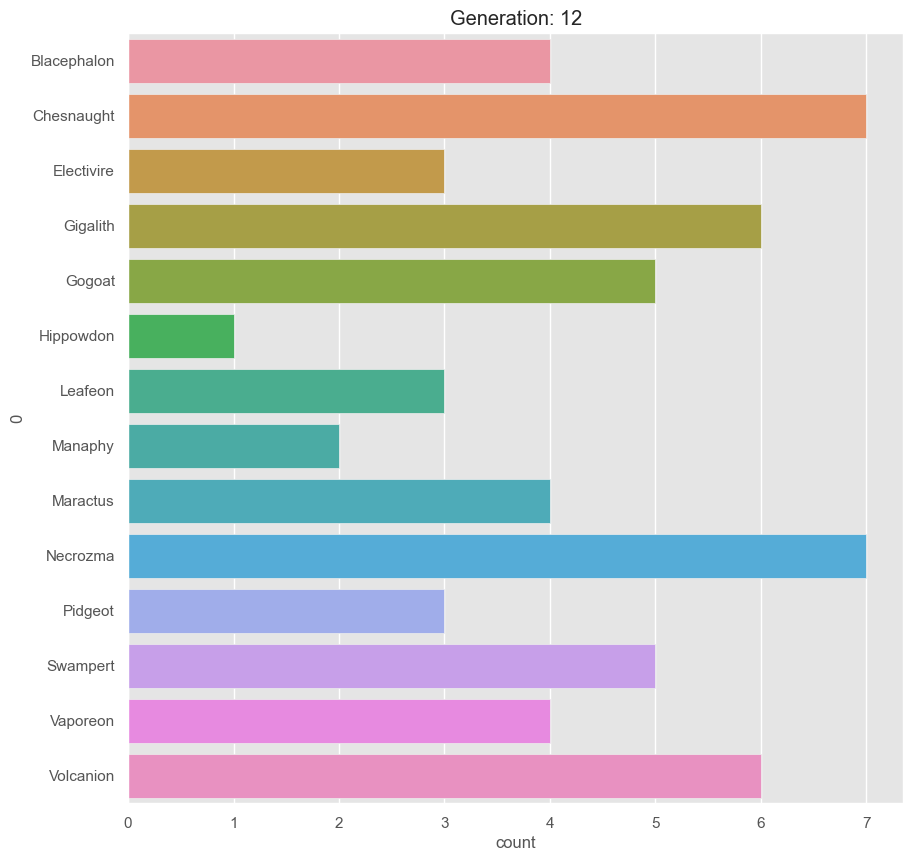

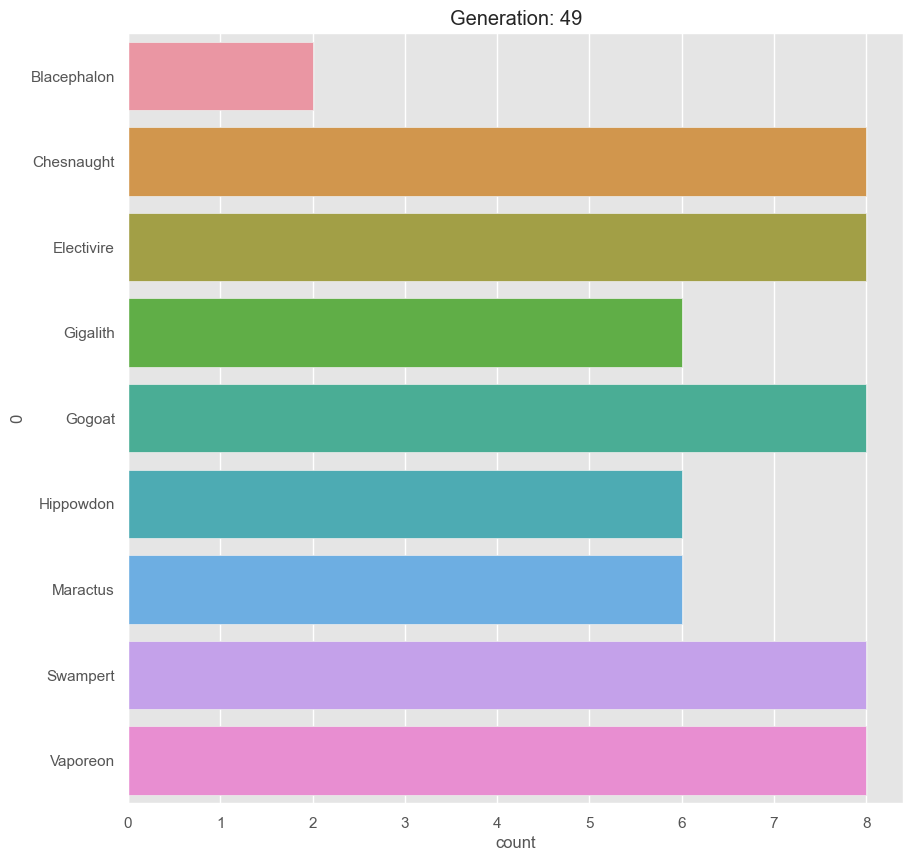

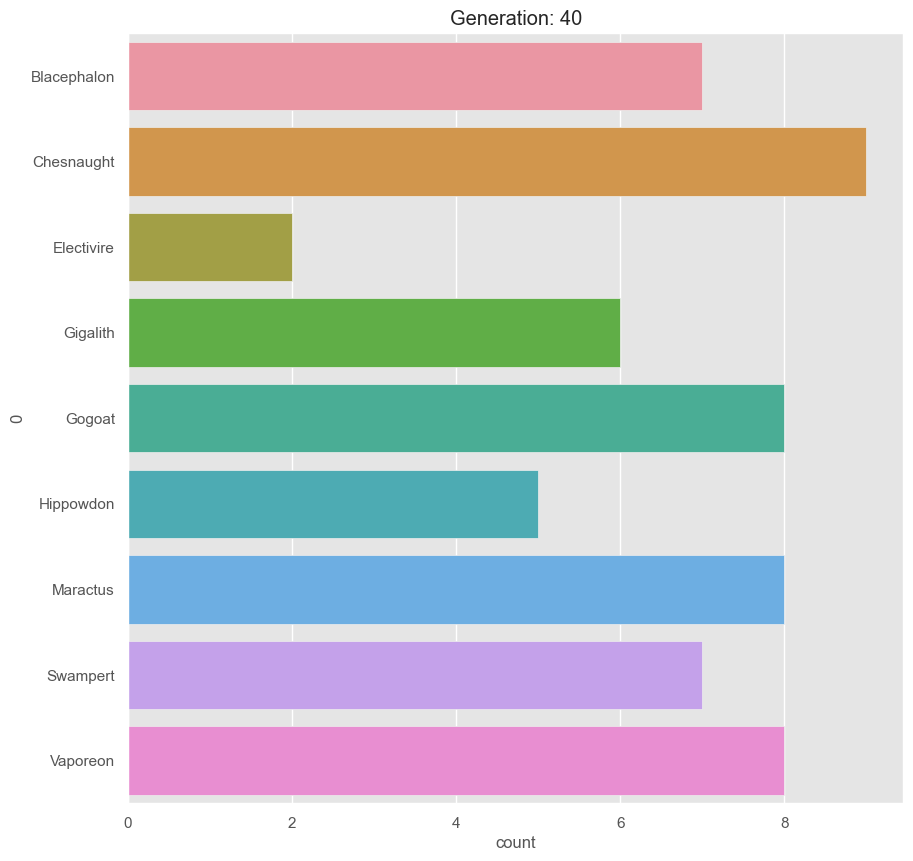

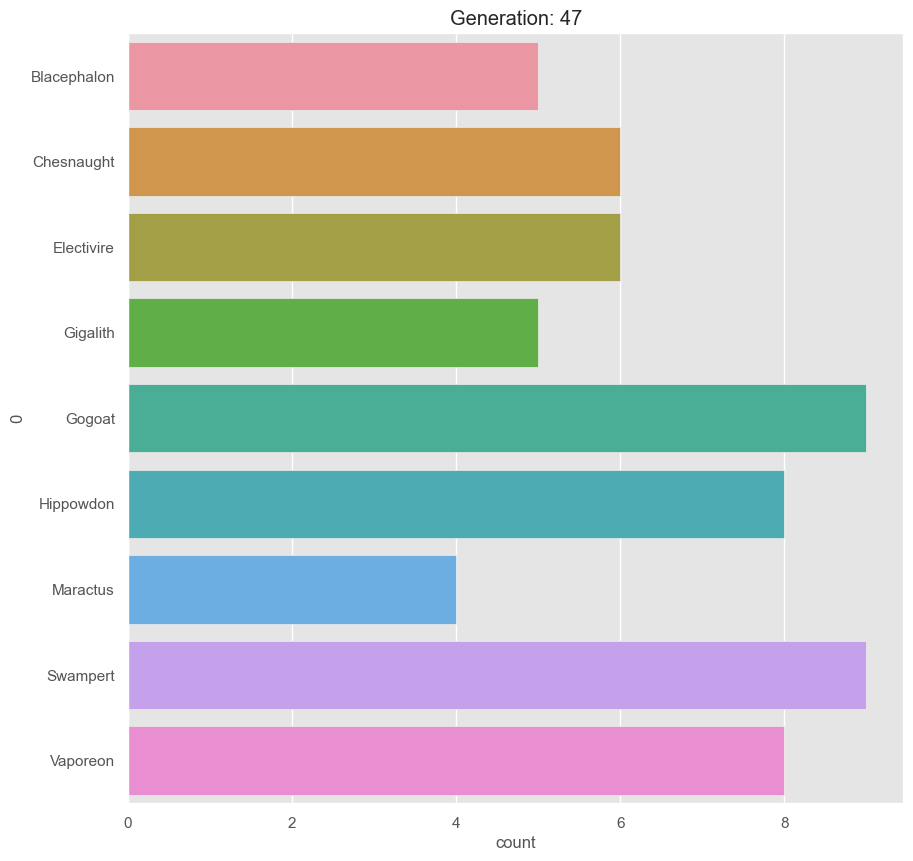

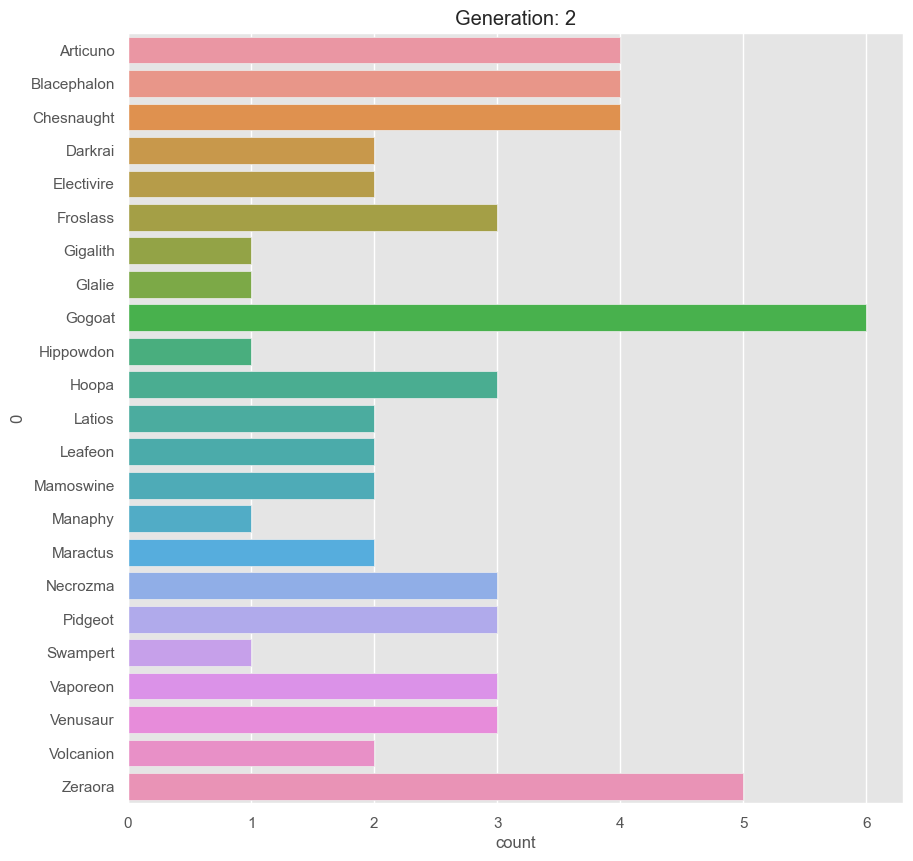

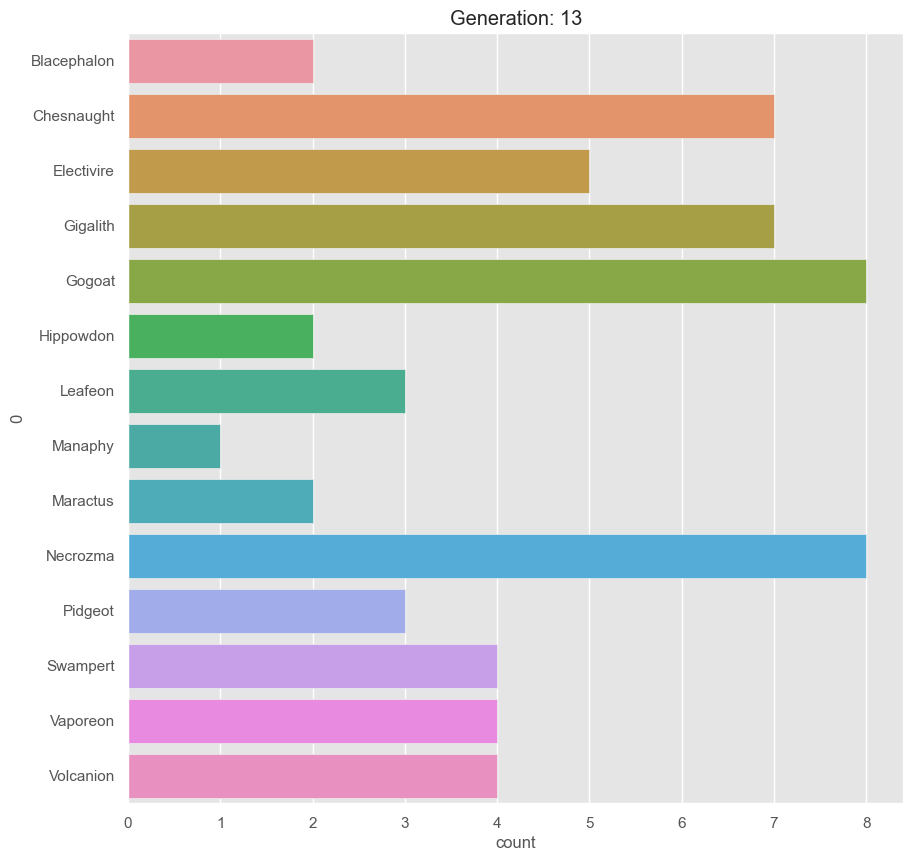

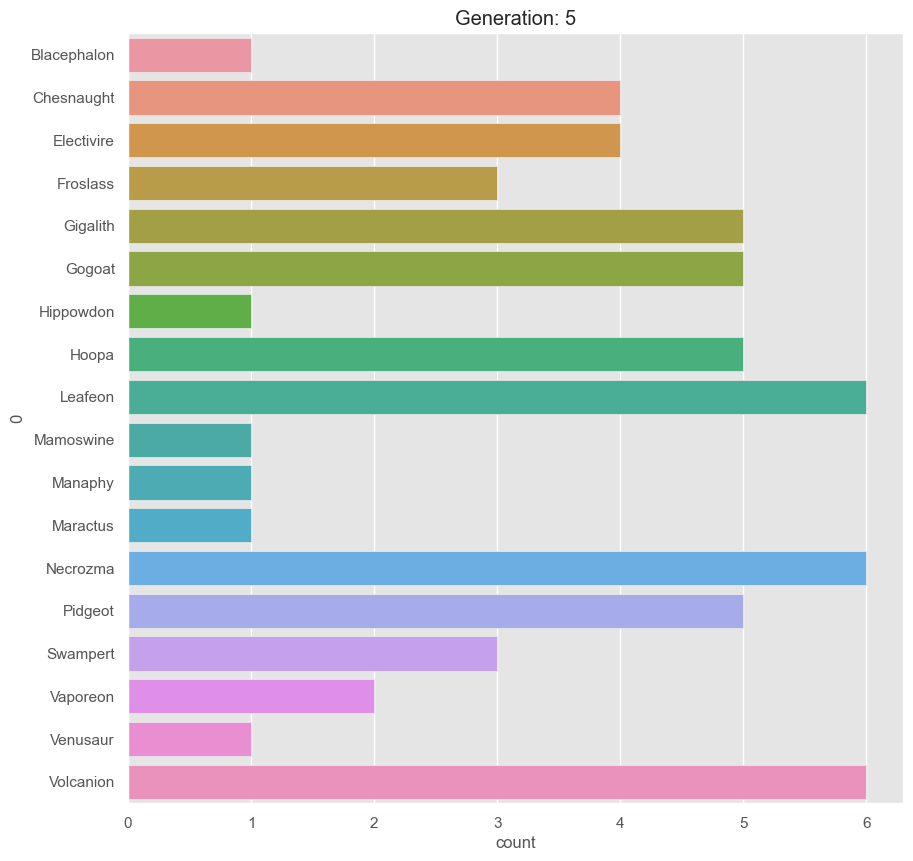

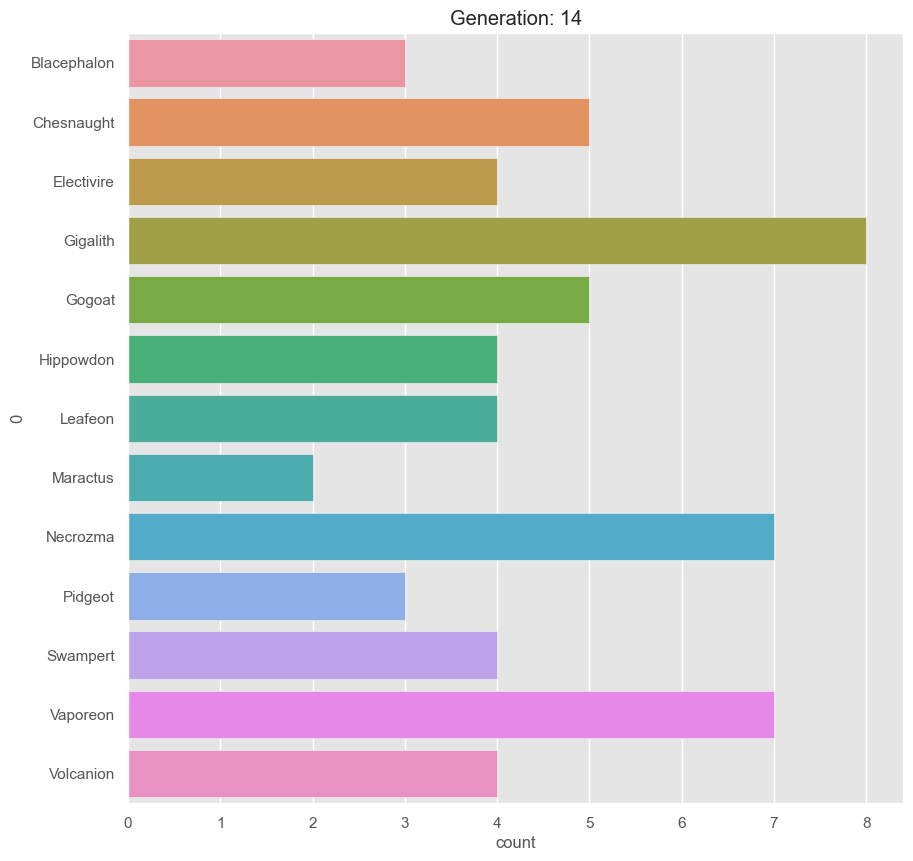

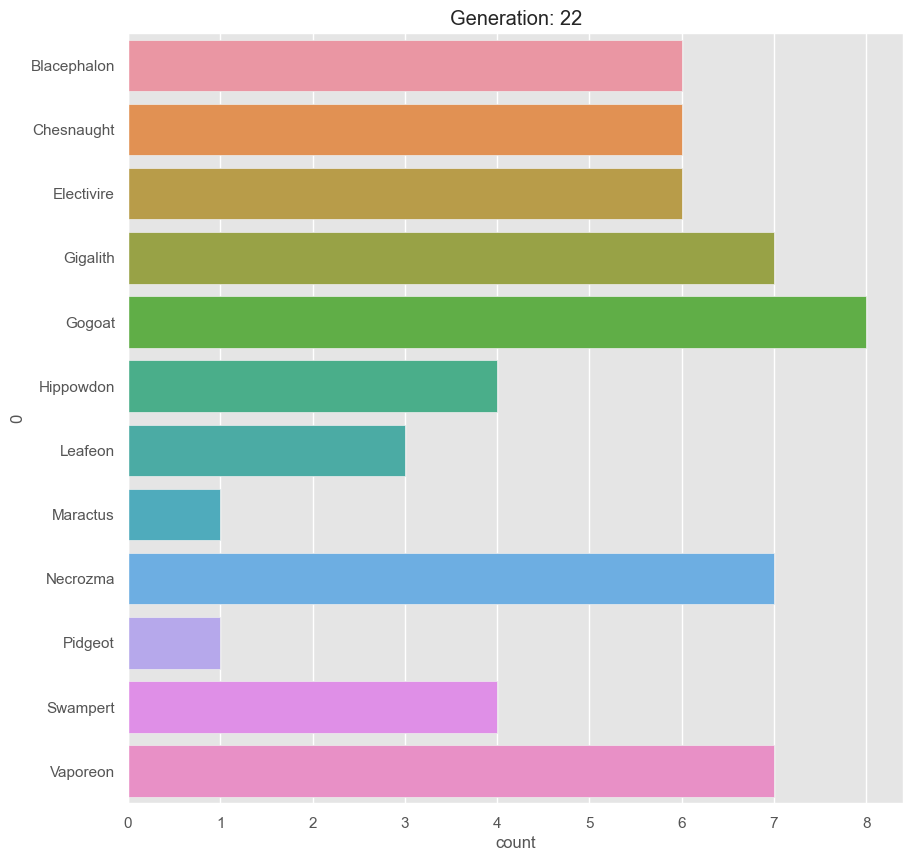

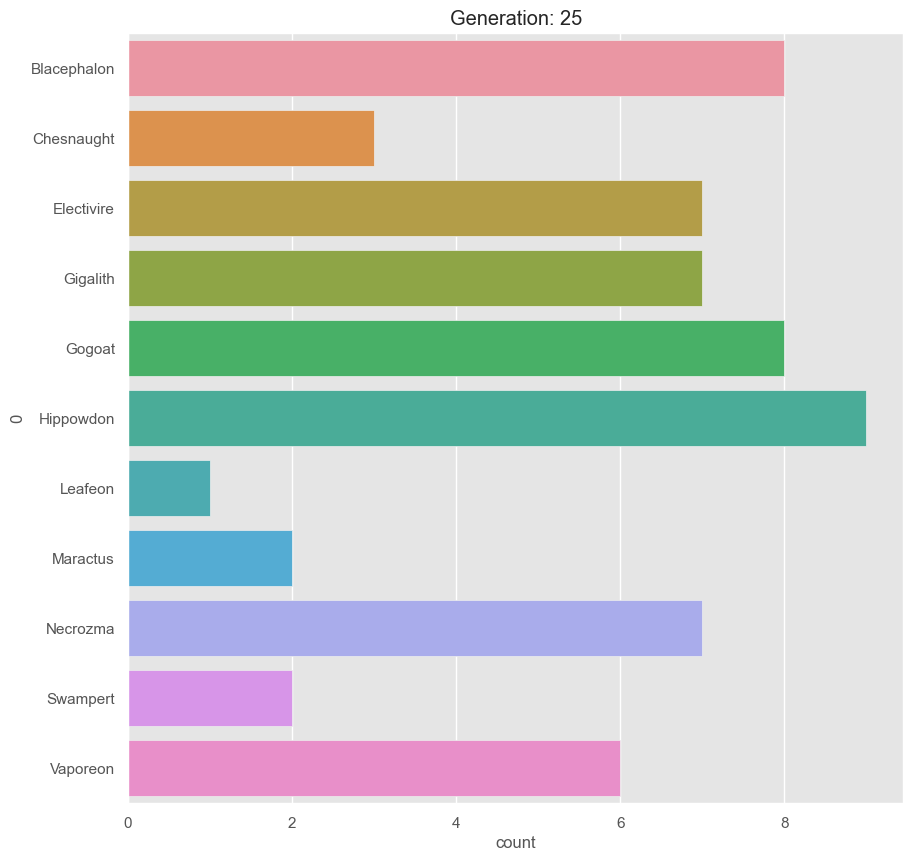

In [5]:
tmp = data.groupby(["0", "generation"])["0"].count().reset_index(name="count")
for gen in data.generation.unique():
    fig, ax = plt.subplots(1, figsize=(10, 10), dpi=100)
    sns.barplot(data=tmp[tmp["generation"] == gen], y="0", x="count", ax=ax)
    ax.set_title(f"Generation: {gen}")
    fig.savefig(f"{gen}.png")